In [2]:
# List of libraries to check and install if missing
libraries = [
    "numpy", "pandas", "time", "folium", "folium.plugins", "sklearn", "seaborn", "matplotlib", "plotly",
    "user_agents", "ip2geotools", "geopy", "category_encoders", "imblearn", "joblib", "xgboost"
]

for library in libraries:
    try:
        # Try importing the library
        exec(f"import {library}")
    except ImportError:
        print(f"Library {library} not found. Installing...")
        !pip install {library}


Library user_agents not found. Installing...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.1/86.1 kB 2.7 MB/s eta 0:00:00
Library ip2geotools not found. Installing...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.5/47.5 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.2/275.2 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.3/92.3 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.3/68.3 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.7/87.7 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.9/521.9 kB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.4/587.4 kB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
# Manipulate
import numpy as np
import pandas as pd
import time
import folium
import folium.plugins as plugins
from sklearn.preprocessing import FunctionTransformer

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Feature Extraction
import user_agents  # Get info from user_agent (browser_info)
from ip2geotools.databases.noncommercial import DbIpCity as ip2geo  # Get location from ip
from geopy.distance import great_circle, geodesic
from geopy.geocoders import Nominatim  # Geocode("place") / reverse("lat,long")
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer  # Text feature

# Pre-Processing
from sklearn.model_selection import train_test_split  # Train-test-split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer  # Detect & handle NaNs
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder  # Ordinal Encoding, Nominal Encoding
from category_encoders import BinaryEncoder  # Nominal Encoding
from imblearn.under_sampling import RandomUnderSampler  # Undersampling
from imblearn.over_sampling import RandomOverSampler, SMOTE  # Oversampling
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler  # Scaling

# Modeling
# 1) Pipeline
from sklearn.pipeline import Pipeline, make_pipeline  # To make pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector  # Apply pipeline to each column

# 2) Regression Models
from sklearn.linear_model import LinearRegression  # If data is small and small_no_features
from sklearn.linear_model import SGDRegressor  # If data is large: (can have penalty=constraints)
from sklearn.preprocessing import PolynomialFeatures  # For polynomial regression (then apply scaling after it)
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV  # Regularization

# 2') Classification Models
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB, BernoulliNB, CategoricalNB, MultinomialNB
from sklearn.svm import LinearSVC, SVC, LinearSVR, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import VotingClassifier, VotingRegressor  # Ensemble (Voting)
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, RandomForestClassifier, RandomForestRegressor, ExtraTreesClassifier, ExtraTreesRegressor  # Bagging & Pasting
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier, GradientBoostingRegressor, HistGradientBoostingClassifier, HistGradientBoostingRegressor  # Boosting
from sklearn.ensemble import StackingClassifier, StackingRegressor  # Stacking

# 3) Model Selection (Underfitting vs Overfitting) [Bias-variance tradeoff => perfect model complexity]
from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold, GridSearchCV, RandomizedSearchCV  # (Train - Valid - Test) + hyperparameters tuning
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV, HalvingRandomSearchCV  # If data / features are large
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error  # Evaluate Model: r2=> accuracy, L2-norm: if no outliers, L1-norm: if outliers
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score
from scipy import stats  # Confidence Interval of Accuracy / Loss / Utility
import joblib  # Save model

# 4) Dimensionality Reduction
from sklearn.decomposition import PCA, IncrementalPCA  # Till 20K features
from sklearn.random_projection import GaussianRandomProjection, SparseRandomProjection  # >20K features
from sklearn.manifold import LocallyLinearEmbedding, MDS, Isomap, TSNE  # Manifold could be better than Projection
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  # For classification problems (large distance between different classes)

from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error


### 1) Understanding Data

* a) Understand Columns
* b) check dtype -> df[col].astype()
* c) Describe Numerical Cols
* d) Describe Categorical Cols

In [4]:
df = pd.read_csv("/kaggle/input/us-airbnb-open-data/AB_US_2023.csv", encoding='utf-8')
df

<ipython-input-4-38c91d9558cd>:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/kaggle/input/us-airbnb-open-data/AB_US_2023.csv", encoding='utf-8')


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,city
0,958,"Bright, Modern Garden Unit - 1BR/1BTH",1169,Holly,NaN,Western Addition,37.770280,-122.433170,Entire home/apt,202,2,383,2023-02-19,2.31,1,128,59,San Francisco
1,5858,Creative Sanctuary,8904,Philip And Tania,NaN,Bernal Heights,37.744740,-122.420890,Entire home/apt,235,30,111,2017-08-06,0.66,1,365,0,San Francisco
2,8142,Friendly Room Apt. Style -UCSF/USF - San Franc...,21994,Aaron,NaN,Haight Ashbury,37.765550,-122.452130,Private room,56,32,9,2022-10-27,0.09,13,365,1,San Francisco
3,8339,Historic Alamo Square Victorian,24215,Rosy,NaN,Western Addition,37.775640,-122.436420,Entire home/apt,575,9,28,2019-06-28,0.17,2,365,0,San Francisco
4,8739,"Mission Sunshine, with Private Bath",7149,Ivan & Wendy,NaN,Mission,37.760300,-122.421970,Private room,110,1,770,2023-02-25,4.65,2,159,34,San Francisco
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232142,849230448624862502,Private Half Moon Bay Oasis By Pillar Point Be...,29395385,Khalid,NaN,Unincorporated Areas,37.506164,-122.476188,Entire home/apt,389,2,0,NaN,NaN,1,365,0,San Mateo County
232143,850805127216414630,Home near SFO,440957696,Christina,NaN,San Bruno,37.623630,-122.426570,Entire home/apt,158,1,0,NaN,NaN,1,364,0,San Mateo County
232144,851562104616413652,Modern New Private Studio in SFO,41574587,Vality,NaN,South San Francisco,37.655661,-122.413130,Entire home/apt,97,1,0,NaN,NaN,32,359,0,San Mateo County
232145,851792795339759410,Lux Bedroom with a Shared Bath near SFO,73133543,Stephannie,NaN,South San Francisco,37.644792,-122.454213,Private room,62,2,0,NaN,NaN,3,67,0,San Mateo County


1. **id**: A unique identifier for each listing in the dataset.
   
2. **name**: The name or title of the listing (e.g., the property’s name).
   
3. **host_id**: A unique identifier for the host, who owns or manages the listing.
   
4. **host_name**: The name of the host managing the listing.
   
5. **neighbourhood_group**: The group or broader region to which the neighbourhood belongs (e.g., a city district or area).
   
6. **neighbourhood**: The specific neighbourhood or locality where the listing is located.
   
7. **latitude**: The geographical latitude coordinate of the listing, showing its position on the Earth's surface.
   
8. **longitude**: The geographical longitude coordinate of the listing, indicating its position east or west of the prime meridian.
   
9. **room_type**: The type of room being offered in the listing, such as Entire Home, Private Room, or Shared Room.
   
10. **price**: The price per night for booking the listing.
   
11. **minimum_nights**: The minimum number of nights a guest must stay when booking the listing.
   
12. **number_of_reviews**: The total number of reviews that have been written for the listing.
   
13. **last_review**: The date when the listing received its most recent review.
   
14. **reviews_per_month**: The average number of reviews the listing receives per month.
   
15. **calculated_host_listings_count**: The total number of listings managed by the same host.
   
16. **availability_365**: The number of days in the year the listing is available for booking.
   
17. **number_of_reviews_ltm**: The total number of reviews the listing has received throughout its lifetime.
   
18. **city**: The city or region where the listing is located.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232147 entries, 0 to 232146
Data columns (total 18 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              232147 non-null  int64  
 1   name                            232131 non-null  object 
 2   host_id                         232147 non-null  int64  
 3   host_name                       232134 non-null  object 
 4   neighbourhood_group             96500 non-null   object 
 5   neighbourhood                   232147 non-null  object 
 6   latitude                        232147 non-null  float64
 7   longitude                       232147 non-null  float64
 8   room_type                       232147 non-null  object 
 9   price                           232147 non-null  int64  
 10  minimum_nights                  232147 non-null  int64  
 11  number_of_reviews               232147 non-null  int64  
 12  last_review     

In [6]:
df.isna().sum()

id                                     0
name                                  16
host_id                                0
host_name                             13
neighbourhood_group               135647
neighbourhood                          0
latitude                               0
longitude                              0
room_type                              0
price                                  0
minimum_nights                         0
number_of_reviews                      0
last_review                        49085
reviews_per_month                  49085
calculated_host_listings_count         0
availability_365                       0
number_of_reviews_ltm                  0
city                                   0
dtype: int64

In [7]:
# Ensure 'last_review' is in datetime format
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

In [8]:
for col in df.columns:
    print(f"number of uniques of \'{col}\' is: {df[col].nunique()}")
    print(f"uniques of \'{col}\' is:\n{df[col].unique()}")
    print()
    print('*' * 50)
    print()

number of uniques of 'id' is: 232146
uniques of 'id' is:
[               958               5858               8142 ...
 851562104616413652 851792795339759410 851801296770555568]

**************************************************

number of uniques of 'name' is: 220164
uniques of 'name' is:
['Bright, Modern Garden Unit - 1BR/1BTH' 'Creative Sanctuary'
 'Friendly Room Apt. Style -UCSF/USF - San Francisco' ...
 'Modern New Private Studio in SFO'
 'Lux Bedroom with a Shared Bath near SFO'
 'Lux Bedroom with Private Bath near SFO']

**************************************************

number of uniques of 'host_id' is: 119582
uniques of 'host_id' is:
[     1169      8904     21994 ...  13795097  29395385 440957696]

**************************************************

number of uniques of 'host_name' is: 29368
uniques of 'host_name' is:
['Holly' 'Philip And Tania' 'Aaron' ... 'Avidar' 'Utsav' 'Sundos']

**************************************************

number of uniques of 'neighbourhood_g

In [9]:
data = df['neighbourhood']


# Function to convert numeric values to NaN and keep alphanumeric as is
def keep_alphanumeric(value):
    # If the value is numeric, replace it with NaN
    # Convert the value to a string first before checking if it's a digit
    if isinstance(value, (int, float)) or (isinstance(value, str) and value.isdigit()):
        return pd.NA  # Replace with NaN for numeric values
    else:
        return value  # Keep alphanumeric values as is

# Apply the function to the 'neighbourhood' column
df['neighbourhood'] = df['neighbourhood'].apply(keep_alphanumeric)

In [10]:
# Try converting the 'neighbourhood' column to numeric, coercing errors to NaN
numeric_check = pd.to_numeric(df['neighbourhood'], errors='coerce')

# Check if any values are still numeric (not NaN)
still_numeric = numeric_check.notna().any()
still_numeric

False

In [11]:
# import pandas as pd
# from geopy.geocoders import Nominatim

# # Initialize the geolocator (this uses OpenStreetMap)
# geolocator = Nominatim(user_agent="geoapiExercises")

# data = df['neighbourhood']


# # Function to get the neighborhood from zip code
# def get_neighbourhood_from_zip(zip_code):
#     try:
#         # Perform geocoding using the zip code
#         location = geolocator.geocode(zip_code)

#         if location:
#             # If location is found, return the neighborhood (or place name)
#             return location.address
#         else:
#             return 'Invalid ZIP'
#     except Exception as e:
#         return 'Invalid ZIP'

# # Apply the function to the 'neighbourhood' column
# df['neighbourhood'] = df['neighbourhood'].apply(get_neighbourhood_from_zip)

# # Display the updated DataFrame
# print(df)


In [12]:
# import pandas as pd
# import re

# # Assuming the original DataFrame (df) is already loaded, otherwise load it first
# # Check if df is already loaded or define it

# # Print the columns to check if 'name' exists
# print("Columns in the dataset:", df.columns)

# # Function to clean text
# def clean_text(text):
#     # Check if the text is a string before processing
#     if isinstance(text, str):
#         # Convert to lowercase
#         text = text.lower()
#         # Remove special characters (non-alphanumeric, except spaces)
#         text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
#         # Remove extra spaces
#         text = re.sub(r"\s+", " ", text).strip()
#     else:
#         # If it's not a string (e.g., NaN or number), return an empty string
#         text = ""
#     return text

# # Apply the cleaning function to the 'name' column
# if 'name' in df.columns:
#     df['name'] = df['name'].apply(clean_text)
# else:
#     print("Error: 'name' column not found.")

# # Display the cleaned dataset
# print("\nCleaned Property Names:")
# print(df[['name']])


In [13]:
# import pandas as pd
# import re

# # Example dataset
# data = pd.DataFrame({
#     'name': df['name']
# })

# # Function to extract features
# def extract_features(property_name):
#     features = {}

#     # Extract location (e.g., city names, neighborhood names)
#     location_match = re.search(r'in\s([a-z\s]+)', property_name)
#     if location_match:
#         features['location'] = location_match.group(1).strip()

#     # Extract specific keywords (pool, pets allowed, parking, etc.)
#     features['pool'] = bool(re.search(r'pool', property_name))
#     features['pets_allowed'] = bool(re.search(r'pets? allowed', property_name))
#     features['parking'] = bool(re.search(r'parking', property_name))
#     features['view'] = bool(re.search(r'view', property_name))
#     features['luxury'] = bool(re.search(r'luxury', property_name))

#     # Extract the number of bedrooms and bathrooms
#     features['bedrooms'] = len(re.findall(r'\d+\s*bedroom', property_name))
#     features['bathrooms'] = len(re.findall(r'\d+\s*bathroom', property_name))

#     return features

# # Apply the function to extract features
# data_features = data['name'].apply(extract_features)

# # Convert the extracted features into a dataframe for easy analysis
# features_df = pd.DataFrame(list(data_features))

# # Merge the original dataset with the extracted features
# data = pd.concat([data, features_df], axis=1)

# # Display the result
# data


In [14]:
df.drop(columns=['id', 'host_id', 'name', 'host_name', 'number_of_reviews', 'reviews_per_month', 'neighbourhood_group'], errors='ignore', inplace=True)

In [15]:
df.columns

Index(['neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'last_review', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'city'],
      dtype='object')

In [16]:
df.describe()

,latitude,longitude,price,minimum_nights,last_review,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,232147.000000,232147.000000,232147.000000,232147.000000,183062,232147.000000,232147.000000,232147.000000
mean,36.610585,-98.301436,259.468001,13.495867,2022-06-01 20:16:18.553714176,29.879055,180.985686,11.689701
min,25.957323,-123.089130,0.000000,1.000000,2010-10-04 00:00:00,1.000000,0.000000,0.000000
25%,33.976225,-118.315111,91.000000,2.000000,2022-08-14 00:00:00,1.000000,52.000000,0.000000
50%,36.190556,-97.727670,149.000000,3.000000,2023-01-20 00:00:00,2.000000,175.000000,3.000000
75%,40.717440,-77.026222,250.000000,30.000000,2023-03-04 00:00:00,10.000000,321.000000,16.000000
max,47.734010,-70.996000,100000.000000,1250.000000,2023-03-31 00:00:00,1003.000000,365.000000,1314.000000
std,5.126523,19.706929,1024.645918,27.920631,NaN,106.013665,134.715299,20.599954


In [17]:
df.describe(include='O')

,neighbourhood,room_type,city
count,214618,232147,232147
unique,1360,4,27
top,Unincorporated Areas,Entire home/apt,New York City
freq,11882,169142,42931


### 2) EXTRACT FEATURES + EDA (uni - bi(heatmap) - multi) -> Insights:
* Uni-variate Analysis
    - Histogram (values)
    - distplot (distrbution)
    - catigorical (pie / count)

* Bi-Variate Analysis
    * Num vs Num
        - Scatter (relationship btn 2 variables)
        - line (trend with time)
    * Num vs Cat (distrbution)
        - box
        - violin
        - strip
    * Cat vs Cat
        - bar (estimate plot)
        - countplot (count rows)

* Multi-Variate Analysis
    * Pairplot



![image.png](attachment:image.png)

In [18]:
# Price ranges for each room type
price_ranges = {
    'Entire home/apt': (30, 100000),
    'Private room': (20, 1000),
    'Shared room': (10, 500),
    'Hotel room': (40, 5000)
}

# Filter the DataFrame based on the price range, handling NaN values in 'room_type'
df = df[df.apply(lambda row: price_ranges.get(row['room_type'], (float('-inf'), float('inf')))[0] <= row['price'] <= price_ranges.get(row['room_type'], (float('-inf'), float('inf')))[1], axis=1)]

# Display the filtered DataFrame
df.reset_index(inplace=True, drop=True)
df

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,last_review,calculated_host_listings_count,availability_365,number_of_reviews_ltm,city
0,Western Addition,37.770280,-122.433170,Entire home/apt,202,2,2023-02-19,1,128,59,San Francisco
1,Bernal Heights,37.744740,-122.420890,Entire home/apt,235,30,2017-08-06,1,365,0,San Francisco
2,Haight Ashbury,37.765550,-122.452130,Private room,56,32,2022-10-27,13,365,1,San Francisco
3,Western Addition,37.775640,-122.436420,Entire home/apt,575,9,2019-06-28,2,365,0,San Francisco
4,Mission,37.760300,-122.421970,Private room,110,1,2023-02-25,2,159,34,San Francisco
...,...,...,...,...,...,...,...,...,...,...,...
230830,Unincorporated Areas,37.506164,-122.476188,Entire home/apt,389,2,NaT,1,365,0,San Mateo County
230831,San Bruno,37.623630,-122.426570,Entire home/apt,158,1,NaT,1,364,0,San Mateo County
230832,South San Francisco,37.655661,-122.413130,Entire home/apt,97,1,NaT,32,359,0,San Mateo County
230833,South San Francisco,37.644792,-122.454213,Private room,62,2,NaT,3,67,0,San Mateo County


![image.png](attachment:image.png)

In [19]:
# Define reasonable ranges for each room type
minimum_nights_ranges = {
    'Entire home/apt': (1, 365),
    'Private room': (1, 180),
    'Shared room': (1, 90),
    'Hotel room': (1, 30)
}

# Filter the DataFrame based on the minimum nights range
df = df[df.apply(
    lambda row: minimum_nights_ranges[row['room_type']][0] <= row['minimum_nights'] <= minimum_nights_ranges[row['room_type']][1],
    axis=1
)]

# Reset index for the filtered DataFrame
df.reset_index(drop=True, inplace=True)

# Display the filtered DataFrame
df

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,last_review,calculated_host_listings_count,availability_365,number_of_reviews_ltm,city
0,Western Addition,37.770280,-122.433170,Entire home/apt,202,2,2023-02-19,1,128,59,San Francisco
1,Bernal Heights,37.744740,-122.420890,Entire home/apt,235,30,2017-08-06,1,365,0,San Francisco
2,Haight Ashbury,37.765550,-122.452130,Private room,56,32,2022-10-27,13,365,1,San Francisco
3,Western Addition,37.775640,-122.436420,Entire home/apt,575,9,2019-06-28,2,365,0,San Francisco
4,Mission,37.760300,-122.421970,Private room,110,1,2023-02-25,2,159,34,San Francisco
...,...,...,...,...,...,...,...,...,...,...,...
230544,Unincorporated Areas,37.506164,-122.476188,Entire home/apt,389,2,NaT,1,365,0,San Mateo County
230545,San Bruno,37.623630,-122.426570,Entire home/apt,158,1,NaT,1,364,0,San Mateo County
230546,South San Francisco,37.655661,-122.413130,Entire home/apt,97,1,NaT,32,359,0,San Mateo County
230547,South San Francisco,37.644792,-122.454213,Private room,62,2,NaT,3,67,0,San Mateo County


In [20]:
# Predefined city centers with their latitudes and longitudes (approximate for each city)
city_centers = {
    'San Francisco': (37.7749, -122.4194),
    'Washington D.C.': (38.9072, -77.0369),
    'Oakland': (37.8044, -122.2711),
    'Jersey City': (40.7178, -74.0431),
    'New Orleans': (29.9511, -90.0715),
    'Los Angeles': (34.0522, -118.2437),
    'New York City': (40.7128, -74.0060),
    'Cambridge': (42.3736, -71.1097),
    'Santa Clara County': (37.3541, -121.9552),
    'Asheville': (35.5951, -82.5515),
    'Salem': (44.9429, -123.0351),
    'Columbus': (39.9612, -82.9988),
    'Rhode Island': (41.6809, -71.5118),
    'San Diego': (32.7157, -117.1611),
    'Nashville': (36.1627, -86.7816),
    'Santa Cruz County': (36.9741, -122.0308),
    'Denver': (39.7392, -104.9903),
    'Chicago': (41.8781, -87.6298),
    'Austin': (30.2672, -97.7431),
    'Pacific Grove': (36.6177, -122.4651),
    'Portland': (45.5152, -122.6784),
    'Seattle': (47.6062, -122.3321),
    'Twin Cities MSA': (44.9778, -93.2650),
    'Broward County': (26.1901, -80.3650),
    'Clark County': (36.0670, -113.3275),
    'Boston': (42.3601, -71.0589),
    'San Mateo County': (37.5336, -122.3141)
}

# Function to calculate distance to city center (in km)
def calculate_distance_to_city_center(row):
    try:
        city_center_coords = city_centers.get(row['city'])  # Get city center coordinates
        if city_center_coords:
            listing_coords = (row['latitude'], row['longitude'])
            return geodesic(listing_coords, city_center_coords).km
        else:
            return None  # If the city is not in city_centers
    except Exception as e:
        return None  # Return None if any error occurs

# Assuming 'df' is your DataFrame with 'latitude', 'longitude', and 'city' columns
df['distance_to_city_center'] = df.apply(calculate_distance_to_city_center, axis=1)


<ipython-input-20-ee8276374199>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['distance_to_city_center'] = df.apply(calculate_distance_to_city_center, axis=1)


In [21]:
# Classify the number of listings managed by the host
def categorize_host_listings(count):
    if pd.isna(count):
        return np.nan
    elif count == 1:
        return "1"
    elif 2 <= count <= 5:
        return "2-5"
    elif 6 <= count <= 20:
        return "6-20"
    elif 21 <= count <= 50:
        return "21-50"
    elif 51 <= count <= 100:
        return "51-100"
    elif count > 100:
        return "100+"
    else:
        return np.nan

# Classify the number of days available for booking
def categorize_availability(days):
    # Replace rows with availability_365 == 0 with NaN
    df.loc[df['availability_365'] == 0, 'availability_365'] = np.nan
    if pd.isna(days) or days == 0:
        return np.nan
    elif 1 <= days <= 30:
        return "1-30 days"
    elif 31 <= days <= 180:
        return "31-180 days"
    elif 181 <= days <= 365:
        return "181-365 days"
    else:
        return np.nan


# Classify the number of reviews in the last 12 months
def categorize_reviews(reviews):
    if pd.isna(reviews):
        return np.nan
    elif reviews == 0:
        return "No Reviews"
    elif 1 <= reviews <= 10:
        return "1-10 Reviews"
    elif 11 <= reviews <= 50:
        return "11-50 Reviews"
    elif 51 <= reviews <= 200:
        return "51-200 Reviews"
    elif reviews > 200:
        return "201+ Reviews"
    else:
        return np.nan



def categorize_distance(distance):
    # Check if the value is NaN or not a valid number
    if pd.isna(distance) or not isinstance(distance, (int, float)):
        return np.nan

    # Define bins and labels
    bins = [0, 5, 20, 50, 100, 200]
    labels = ['Very Close', 'Close', 'Moderate', 'Far', 'Very Far']

    # Categorize the distance using pd.cut
    return pd.cut([distance], bins=bins, labels=labels, right=True)[0]



df['reviews_category'] = df['number_of_reviews_ltm'].apply(categorize_reviews)
df['host_listings_category'] = df['calculated_host_listings_count'].apply(categorize_host_listings)
df['availability_category'] = df['availability_365'].apply(categorize_availability)
df['distance_category'] = df['distance_to_city_center'].apply(categorize_distance)



<ipython-input-21-8cbe8851cc09>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews_category'] = df['number_of_reviews_ltm'].apply(categorize_reviews)
<ipython-input-21-8cbe8851cc09>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['host_listings_category'] = df['calculated_host_listings_count'].apply(categorize_host_listings)
<ipython-input-21-8cbe8851cc09>:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

In [22]:

# Define a function to map months to seasons
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'

# Apply the function to the 'last_review' column
df['season'] = df['last_review'].dt.month.apply(get_season)

df['season'].value_counts()

<ipython-input-22-032137677143>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['season'] = df['last_review'].dt.month.apply(get_season)


season
Winter    72423
Spring    61869
Autumn    29548
Summer    18560
Name: count, dtype: int64

In [23]:
df['price_per_distance'] = df['price'] / (df['distance_to_city_center'] + 1)  # Adding 1 to avoid division by zero

df['price_per_room_type'] = df.groupby('room_type')['price'].transform('median')
df['price_relative_to_room_type'] = df['price'] / df['price_per_room_type']

<ipython-input-23-17483915c148>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_per_distance'] = df['price'] / (df['distance_to_city_center'] + 1)  # Adding 1 to avoid division by zero
<ipython-input-23-17483915c148>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_per_room_type'] = df.groupby('room_type')['price'].transform('median')
<ipython-input-23-17483915c148>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

In [24]:
# from geopy.geocoders import Nominatim
# import pandas as pd
# import time

# # Initialize geocoder
# geolocator = Nominatim(user_agent="neighbourhood_geocoder")

# # Function to get the neighbourhood or city based on lat, long
# def get_neighbourhood_group(lat, lon):
#     try:
#         # Reverse geocode the coordinates to get the address
#         location = geolocator.reverse((lat, lon), language='en', exactly_one=True)
#         # Extract neighbourhood or city from the address (You may need to customize this based on the format)
#         if location:
#             address = location.raw.get('address', {})
#             neighbourhood_group = address.get('suburb', '') or address.get('city', '') or address.get('town', '')
#             return neighbourhood_group
#         return None
#     except Exception as e:
#         print(f"Error with coordinates ({lat}, {lon}): {e}")
#         return None

# # Apply the function to your DataFrame
# df['neighbourhood_group'] = df.apply(lambda row: get_neighbourhood_group(row['latitude'], row['longitude']), axis=1)

# # Optional: To avoid hitting the API too quickly, you can add a sleep time between requests
# # time.sleep(1)  # Add a 1-second delay between requests (optional)

# # Check the result
# print(df[['latitude', 'longitude', 'neighbourhood_group']].head())



# -------------------------------------------------------------------------------------------------------------------------------------------------





# # Step 1: Generate city_neighbourhood_group_mapping dynamically based on 'city' and 'neighbourhood'
# def generate_city_neighbourhood_group_mapping(df):
#     mapping = {}
#     for _, row in df.iterrows():
#         city = row['city']
#         neighbourhood = row['neighbourhood']
#         neighbourhood_group = row['neighbourhood_group']

#         # Skip if 'neighbourhood_group' is NaN
#         if pd.notna(neighbourhood_group):
#             if city not in mapping:
#                 mapping[city] = {}
#             mapping[city][neighbourhood] = neighbourhood_group
#     return mapping

# # Generate the mapping
# city_neighbourhood_group_mapping = generate_city_neighbourhood_group_mapping(df)

# # Step 2: Fill 'neighbourhood_group' based on 'city' and 'neighbourhood' using the mapping
# def map_neighbourhood_group(row):
#     city = row['city']
#     neighbourhood = row['neighbourhood']
#     if pd.notna(row['neighbourhood_group']):
#         return row['neighbourhood_group']
#     elif city in city_neighbourhood_group_mapping and neighbourhood in city_neighbourhood_group_mapping[city]:
#         return city_neighbourhood_group_mapping[city][neighbourhood]
#     else:
#         return np.nan

# # Apply the mapping to the DataFrame
# df['neighbourhood_group'] = df.apply(map_neighbourhood_group, axis=1)

# # Step 3: Use reverse geocoding for rows with missing 'neighbourhood_group'
# missing_values = df[df['neighbourhood_group'].isna()]

# # Initialize geolocator for reverse geocoding
# geolocator = Nominatim(user_agent="myGeocoder")

# def reverse_geocode(row):
#     location = geolocator.reverse((row['latitude'], row['longitude']), language='en', timeout=10)
#     if location:
#         # Extract the city or neighbourhood group from the location
#         return location.raw.get('address', {}).get('suburb', 'Unknown')
#     else:
#         return 'Unknown'

# # For rows where 'neighbourhood_group' is NaN, use reverse geocoding
# df.loc[df['neighbourhood_group'].isna(), 'neighbourhood_group'] = df[df['neighbourhood_group'].isna()].apply(reverse_geocode, axis=1)

# # Print the final DataFrame
# print(df)


In [25]:
for col in df.columns:
    print(f"number of uniques of \'{col}\' is: {df[col].nunique()}")
    print(f"uniques of \'{col}\' is:\n{df[col].unique()}")
    print()
    print('*' * 50)
    print()

number of uniques of 'neighbourhood' is: 1360
uniques of 'neighbourhood' is:
['Western Addition' 'Bernal Heights' 'Haight Ashbury' ... 'East Palo Alto'
 'Millbrae' 'Colma']

**************************************************

number of uniques of 'latitude' is: 157319
uniques of 'latitude' is:
[37.77028    37.74474    37.76555    ... 37.65566104 37.64479216
 37.64265463]

**************************************************

number of uniques of 'longitude' is: 159327
uniques of 'longitude' is:
[-122.43317    -122.42089    -122.45213    ... -122.41313048 -122.45421315
 -122.45239127]

**************************************************

number of uniques of 'room_type' is: 4
uniques of 'room_type' is:
['Entire home/apt' 'Private room' 'Shared room' 'Hotel room']

**************************************************

number of uniques of 'price' is: 2299
uniques of 'price' is:
[ 202  235   56 ... 2112 3993 2145]

**************************************************

number of uniques of 'minim

In [26]:
df.isna().sum()

neighbourhood                     17458
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
last_review                       48149
calculated_host_listings_count        0
availability_365                  36496
number_of_reviews_ltm                 0
city                                  0
distance_to_city_center               0
reviews_category                      0
host_listings_category                0
availability_category             36496
distance_category                    10
season                            48149
price_per_distance                    0
price_per_room_type                   0
price_relative_to_room_type           0
dtype: int64

In [27]:
df.columns

Index(['neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'last_review', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'city',
       'distance_to_city_center', 'reviews_category', 'host_listings_category',
       'availability_category', 'distance_category', 'season',
       'price_per_distance', 'price_per_room_type',
       'price_relative_to_room_type'],
      dtype='object')

In [28]:
df.describe()

,latitude,longitude,price,minimum_nights,last_review,calculated_host_listings_count,availability_365,number_of_reviews_ltm,distance_to_city_center,price_per_distance,price_per_room_type,price_relative_to_room_type
count,230549.000000,230549.000000,230549.000000,230549.000000,182400,230549.000000,194053.000000,230549.000000,230549.000000,230549.000000,230549.000000,230549.000000
mean,36.610127,-98.277570,237.986615,12.985443,2022-06-03 05:12:32.210526208,29.646925,215.199765,11.751220,20.647699,35.392000,150.112518,1.565171
min,25.957323,-123.089130,11.000000,1.000000,2010-10-04 00:00:00,1.000000,1.000000,0.000000,0.003791,0.098303,42.000000,0.153558
25%,33.974400,-118.314660,91.000000,2.000000,2022-08-15 00:00:00,1.000000,97.000000,0.000000,3.964249,6.383254,75.000000,0.683616
50%,36.191430,-97.726532,149.000000,3.000000,2023-01-21 00:00:00,2.000000,231.000000,3.000000,8.668827,14.765207,177.000000,1.000000
75%,40.717480,-77.025730,250.000000,30.000000,2023-03-04 00:00:00,10.000000,333.000000,16.000000,19.639346,35.899894,177.000000,1.593220
max,47.734010,-70.996000,100000.000000,365.000000,2023-03-31 00:00:00,1003.000000,365.000000,1314.000000,213.044899,59387.962517,267.000000,564.971751
std,5.133466,19.705821,753.709219,21.351386,NaN,105.960399,119.155862,20.608613,37.992906,175.928907,46.097288,4.290048


In [29]:
df.describe(include='O')

,neighbourhood,room_type,city,reviews_category,host_listings_category,availability_category,distance_category,season
count,213091,230549,230549,230549,230549,194053,230539,182400
unique,1360,4,27,5,6,3,5,4
top,Unincorporated Areas,Entire home/apt,New York City,No Reviews,1,181-365 days,Close,Winter
freq,11596,168917,42635,81814,92450,110033,101385,72423


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


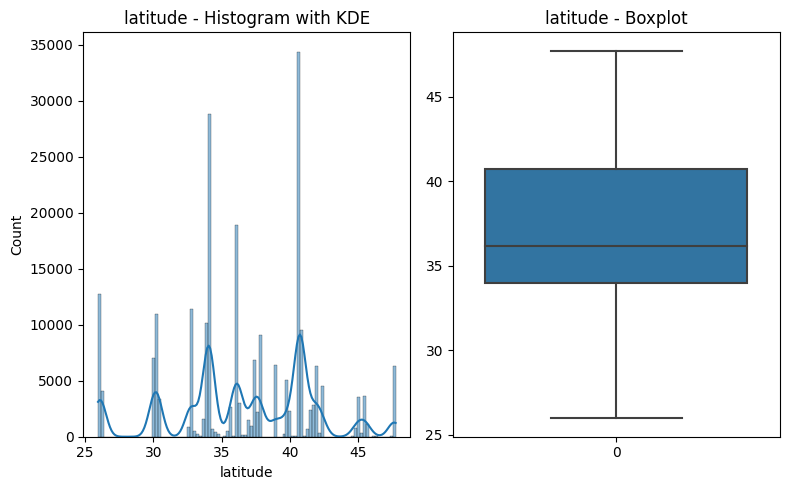

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


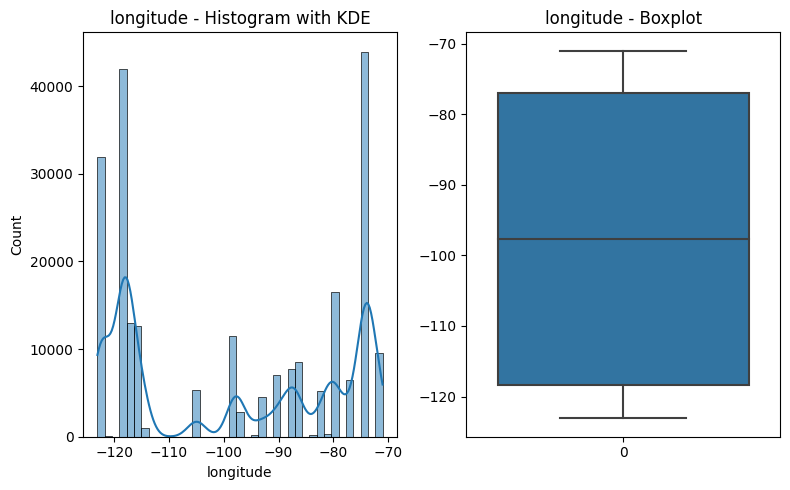

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


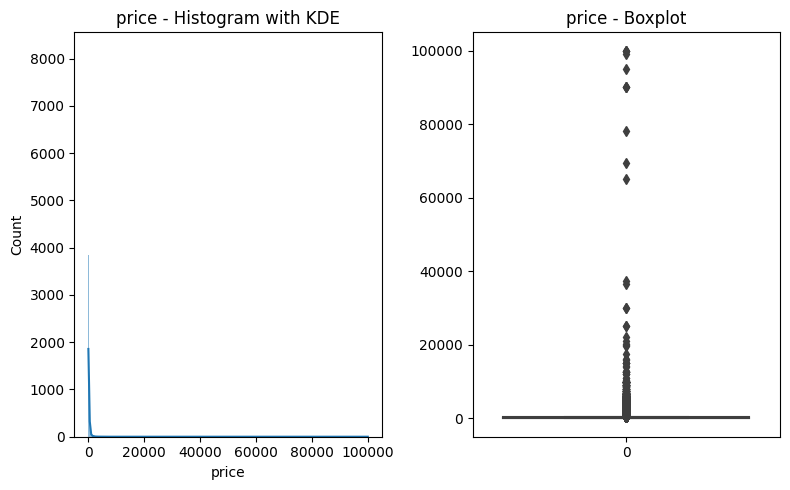

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


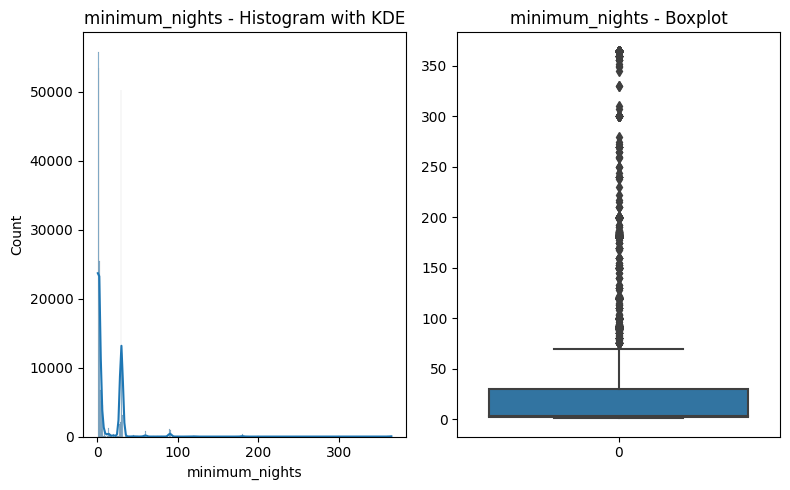

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


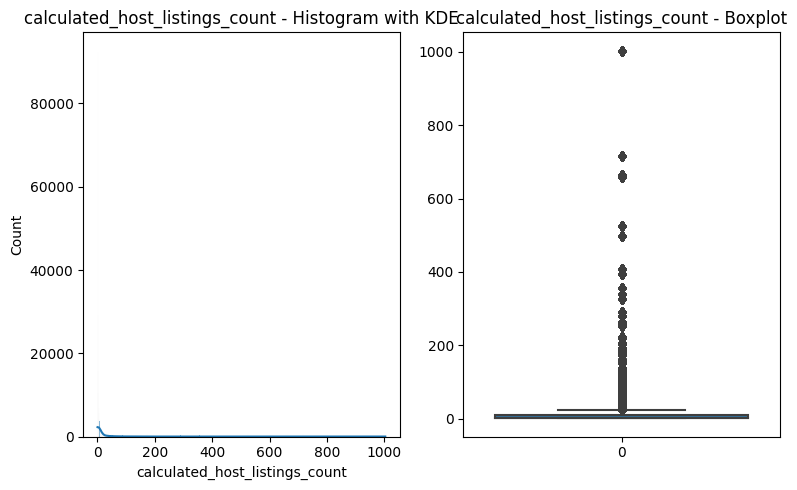

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


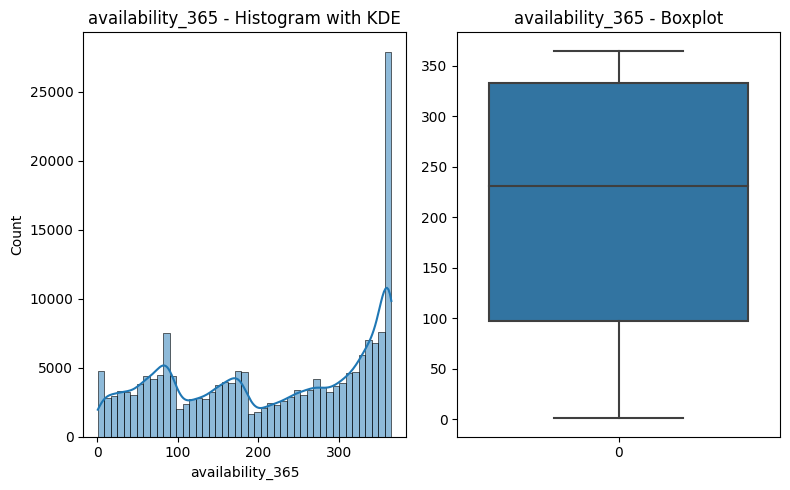

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


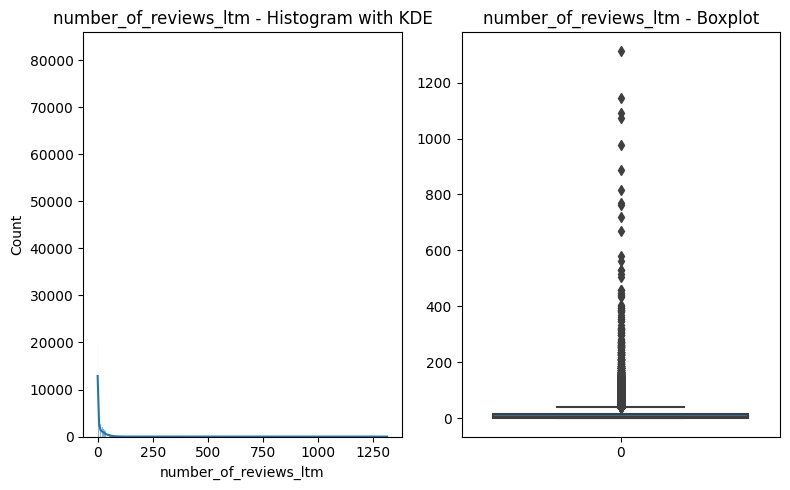

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


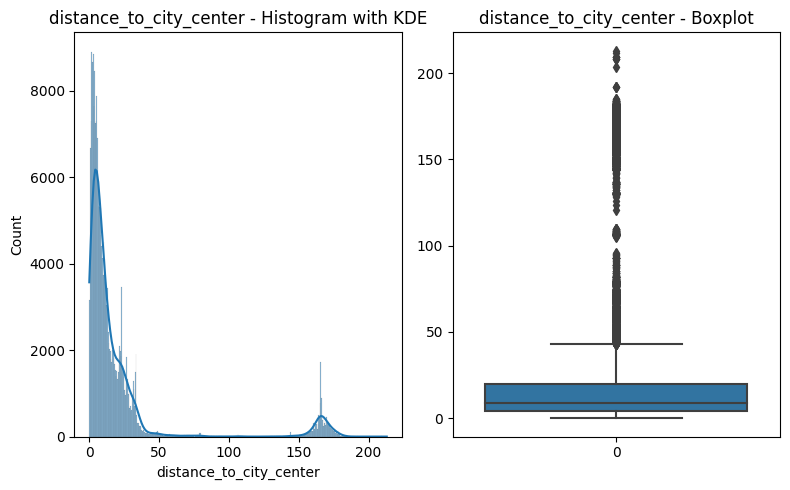

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


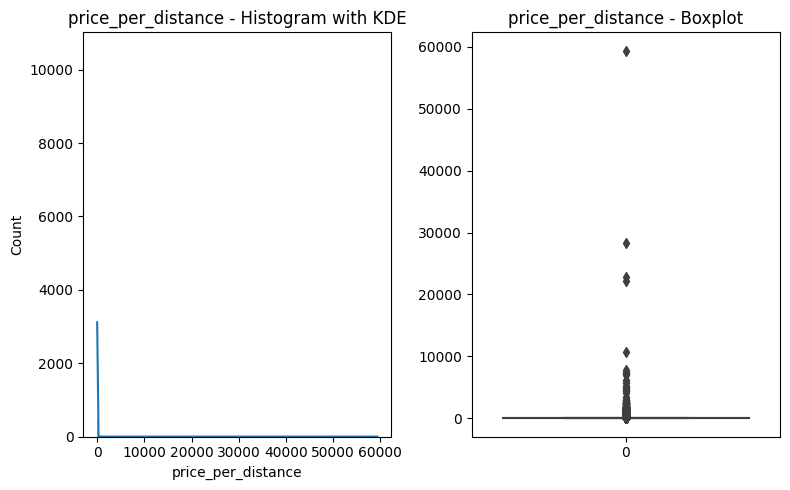

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


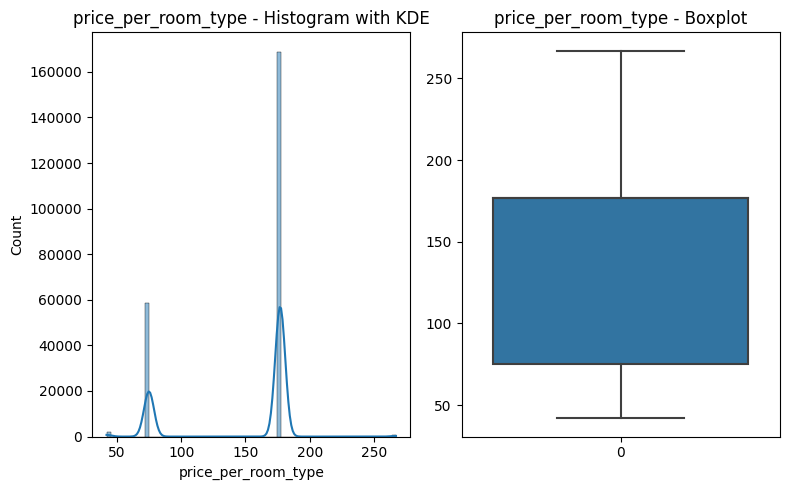

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


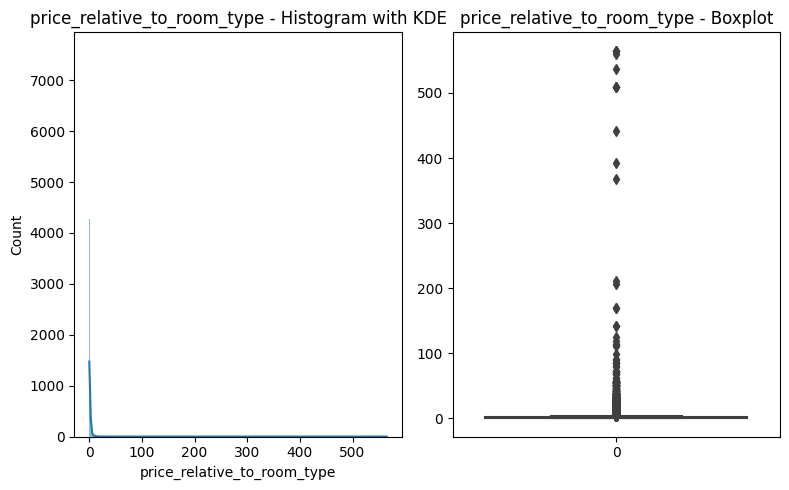

In [30]:
# uni-variate
num_cols = df.select_dtypes(include='number').columns

for col in num_cols:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,5))
    sns.histplot(df[col], kde=True, ax=axes[0])
    axes[0].set_title(f'{col} - Histogram with KDE')
    sns.boxplot(df[col], ax=axes[1])
    axes[1].set_title(f'{col} - Boxplot')
    plt.tight_layout()
    plt.show()


# price, minimum_nights, distance_to_city_center, calculated_host_listings_count, number_of_reviews_ltm, price_per_distance, price_relative_to_room_type: right skewed --> log


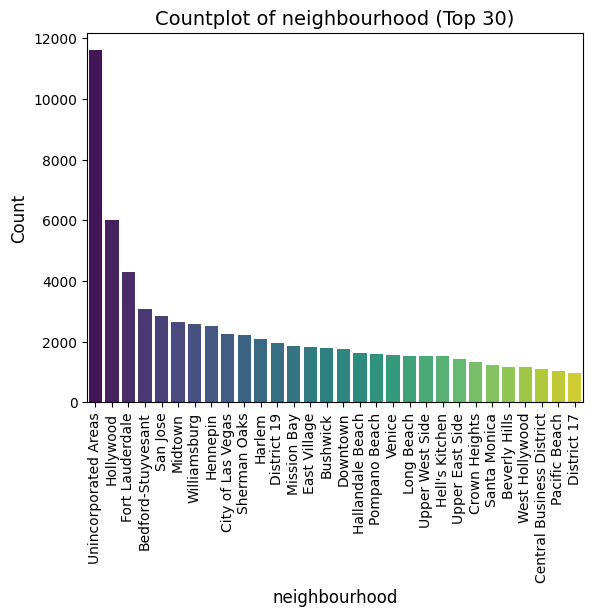

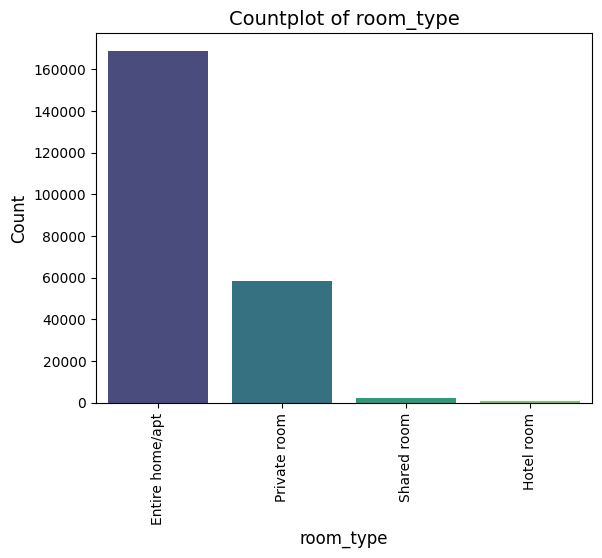

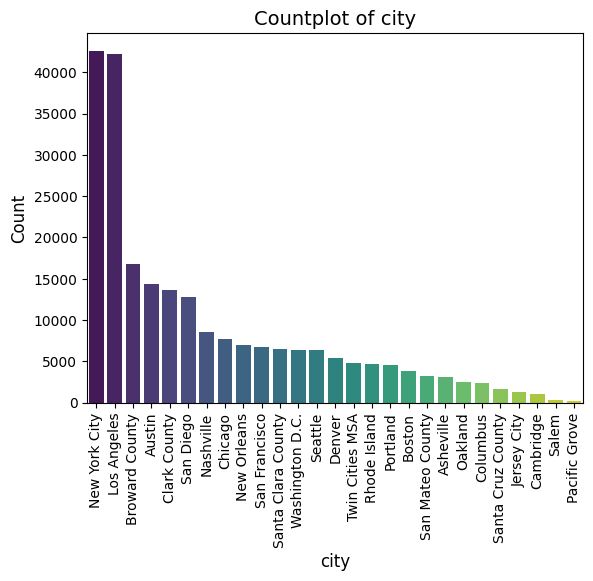

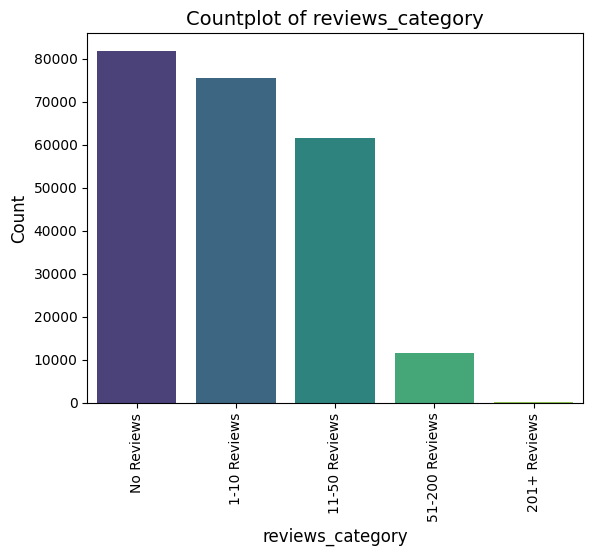

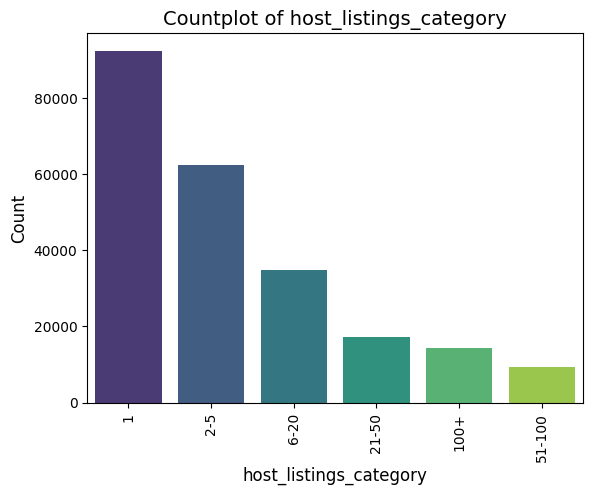

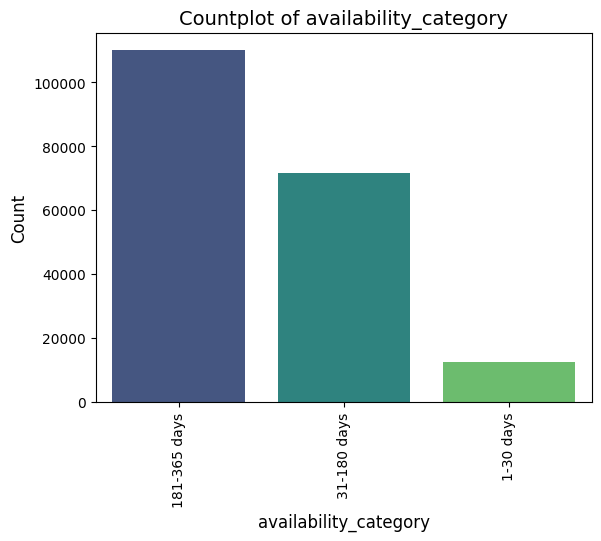

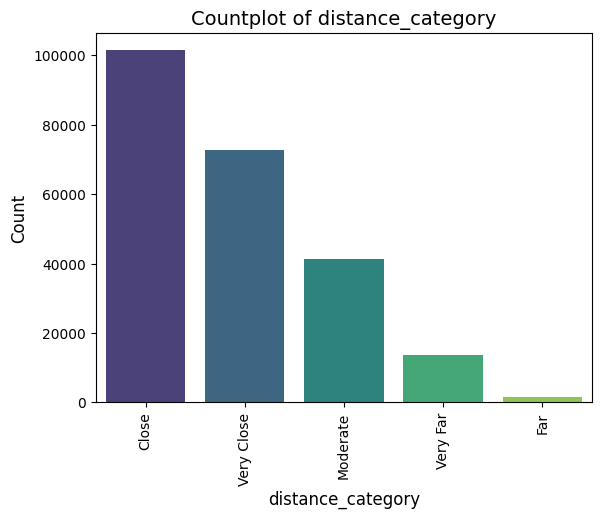

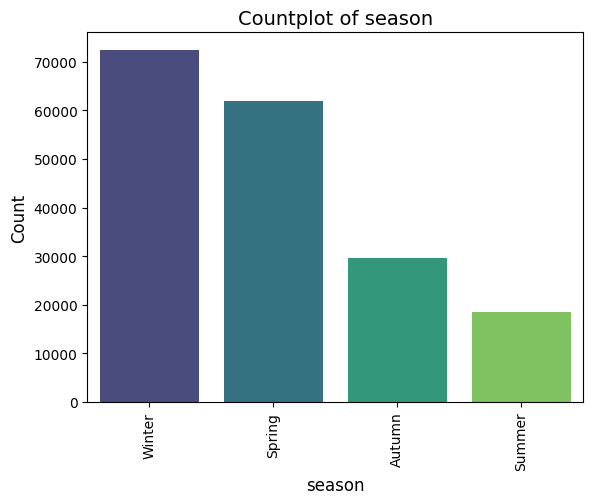

In [31]:
for column in df.select_dtypes(include="O").columns:
    plt.tight_layout()

    # Get the top 30 most frequent values
    top_30 = df[column].value_counts().head(30)

    sns.barplot(x=top_30.index, y=top_30.values, palette='viridis')
    if column == 'neighbourhood':
        plt.title(f'Countplot of {column} (Top 30)', fontsize=14)
    else:
        plt.title(f'Countplot of {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=90)
    plt.show()


<Axes: >

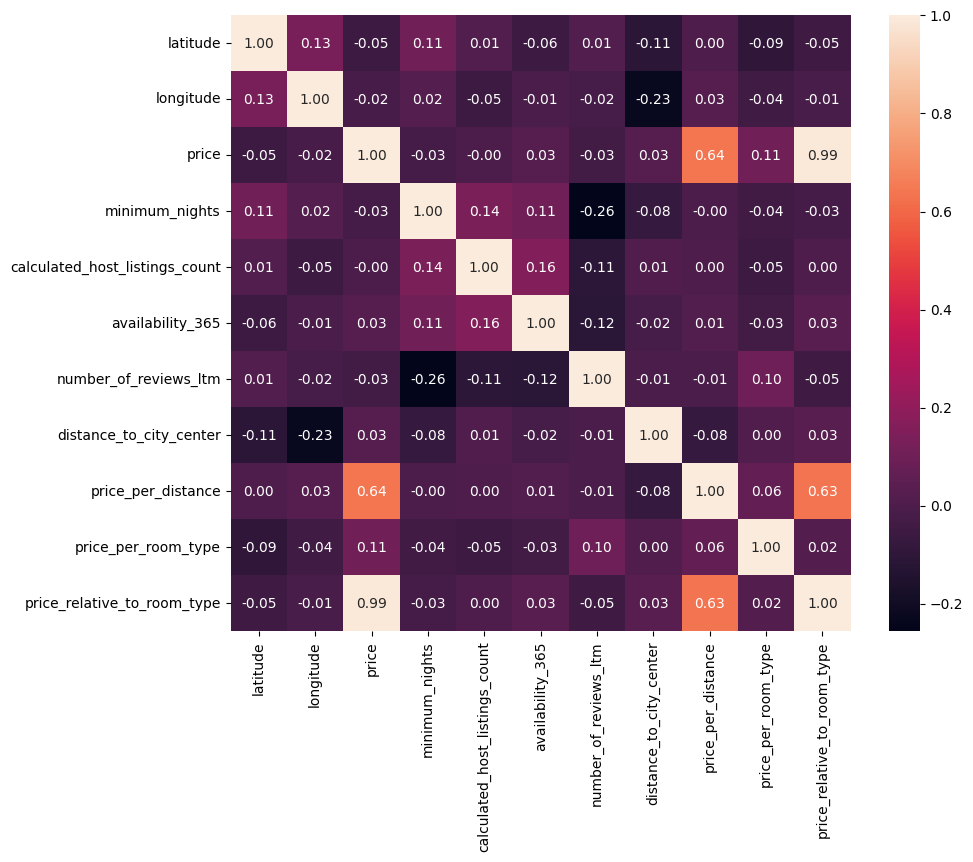

In [32]:
plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes(include=['number']).corr(), fmt=".2f", annot=True)

1) What is the average price per room type?

In [33]:
(df.groupby("room_type")["price"].median() / df.groupby("room_type")["price"].median().sum() * 100).round(1).reset_index()

,room_type,price
0,Entire home/apt,31.6
1,Hotel room,47.6
2,Private room,13.4
3,Shared room,7.5


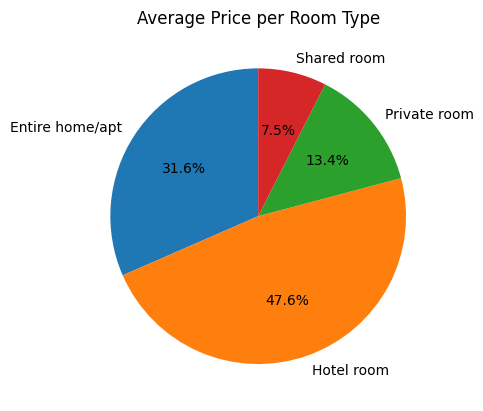

In [34]:
room_type_avg_price = df.groupby('room_type')['price'].median()
plt.pie(room_type_avg_price, labels=room_type_avg_price.index, autopct='%1.1f%%', startangle=90)
plt.title('Average Price per Room Type')
plt.show()


2) How does the price vary over time across different seasons?

In [35]:
(df.groupby([df['last_review'].dt.year, 'season'])['price']).median().unstack().reset_index()

season,last_review,Autumn,Spring,Summer,Winter
0,2010.0,150.0,NaN,NaN,NaN
1,2011.0,NaN,105.0,NaN,100.0
2,2012.0,193.5,175.0,100.0,164.0
3,2013.0,149.0,175.0,170.0,150.0
4,2014.0,147.5,159.0,150.0,121.0
5,2015.0,115.0,139.5,114.5,104.0
6,2016.0,118.5,120.0,100.0,106.0
7,2017.0,100.0,115.0,100.0,107.0
8,2018.0,110.0,100.0,106.0,102.0
9,2019.0,110.0,115.0,114.0,114.0


<ipython-input-36-17dbf4c5c8fb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['last_review'] = pd.to_datetime(df['last_review'])
<ipython-input-36-17dbf4c5c8fb>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(data=df, x=df_year, y='price', hue='season', ci=False)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

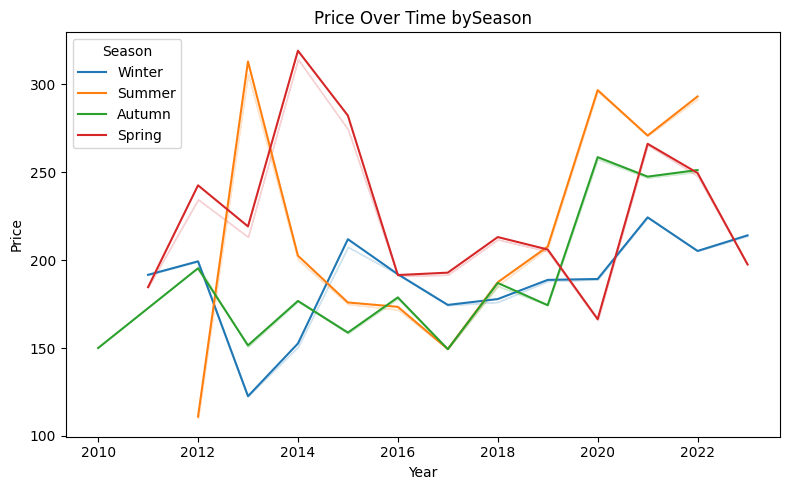

In [36]:
# Ensure 'last_review' is in datetime format
df['last_review'] = pd.to_datetime(df['last_review'])

# Extract the year and add it as a column
df_year= df['last_review'].dt.year

# Plot using Seaborn: No aggregation, just plot the raw price data
plt.figure(figsize=(8, 5))  # Optional: adjust the plot size
sns.lineplot(data=df, x=df_year, y='price', hue='season', ci=False)
plt.title('Price Over Time bySeason')
plt.ylabel('Price')
plt.xlabel('Year')
plt.legend(title='Season')  # Adjusting the legend location
plt.tight_layout()  # To make sure everything fits
plt.show()



3) How does the price of properties correlate with their availability for the year (availability_365)?

In [37]:
df.groupby('room_type')['availability_365'].describe()

,count,mean,std,min,25%,50%,75%,max
room_type,,,,,,,,
Entire home/apt,146683.0,213.379042,116.281778,1.0,106.00,228.0,327.0,365.0
Hotel room,787.0,182.302414,133.830416,3.0,35.00,204.0,309.0,365.0
Private room,45045.0,219.914885,127.221547,1.0,89.00,245.0,352.0,365.0
Shared room,1538.0,267.583875,119.994187,1.0,168.25,342.0,364.0,365.0


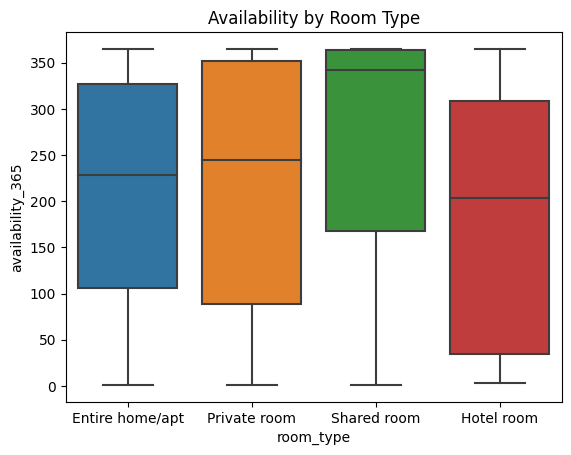

In [38]:
sns.boxplot(x='room_type', y='availability_365', data=df)
plt.title('Availability by Room Type')
plt.show()


4) Which are the top 10 neighborhoods with the highest number of listings, and how do the room types vary across these neighborhoods?

In [39]:
# Create a DataFrame for the top neighborhoods, including room_type information
top_neighbourhoods = df[df['neighbourhood'].isin(df['neighbourhood'].value_counts().head(10).index)]

# Group by 'neighbourhood' and 'room_type', then count the number of listings
top_neighbourhood_counts = (
    top_neighbourhoods.groupby(['neighbourhood', 'room_type'])
    .size()
    .unstack(fill_value=0)
    .reset_index()
)

# Add a column for the total listings per neighborhood
top_neighbourhood_counts['Total Listings'] = top_neighbourhood_counts.iloc[:, 1:].sum(axis=1)

top_neighbourhood_counts.sort_values('Total Listings',ascending=False)


room_type,neighbourhood,Entire home/apt,Hotel room,Private room,Shared room,Total Listings
8,Unincorporated Areas,8384,244,2921,47,11596
4,Hollywood,5216,22,677,78,5993
2,Fort Lauderdale,3838,16,423,9,4286
0,Bedford-Stuyvesant,1540,0,1498,40,3078
6,San Jose,1539,0,1254,45,2838
5,Midtown,1815,46,777,20,2658
9,Williamsburg,1459,0,1104,29,2592
3,Hennepin,1947,5,569,3,2524
1,City of Las Vegas,1660,7,562,13,2242
7,Sherman Oaks,347,0,1848,10,2205


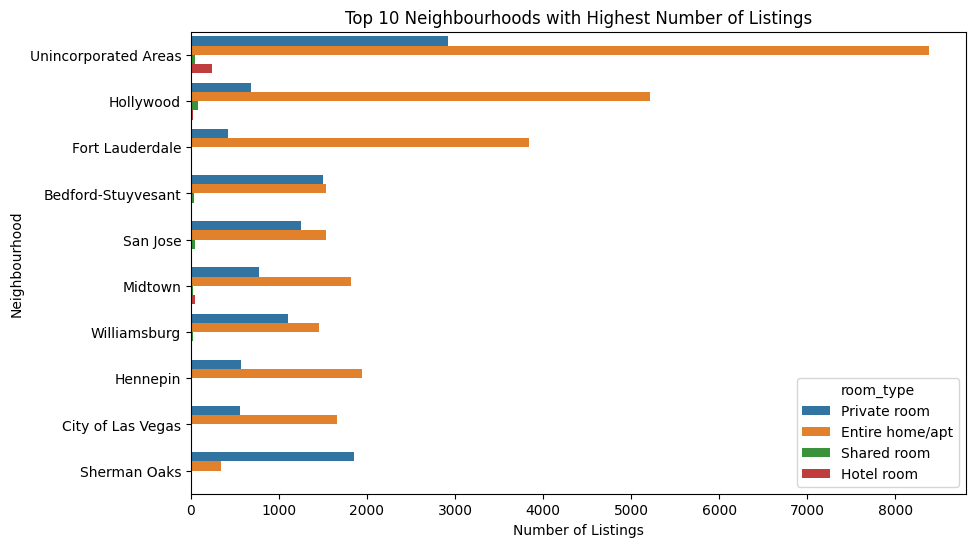

In [40]:
# Get the top 10 neighborhoods with the highest number of listings
neighbourhood_count = df['neighbourhood'].value_counts().head(10)

# Create a new DataFrame to use for the plot, including room_type information
top_neighbourhoods = df[df['neighbourhood'].isin(neighbourhood_count.index)]

# Plot using seaborn with 'room_type' as hue
plt.figure(figsize=(10,6))
sns.countplot(data=top_neighbourhoods, y='neighbourhood', hue='room_type', order=neighbourhood_count.index)
plt.title('Top 10 Neighbourhoods with Highest Number of Listings')
plt.xlabel('Number of Listings')
plt.ylabel('Neighbourhood')
plt.show()


5) What is the relationship between minimum nights and room type across different seasons?



In [41]:
df.groupby(['room_type', 'season'])['minimum_nights'].mean().reset_index()


,room_type,season,minimum_nights
0,Entire home/apt,Autumn,16.740441
1,Entire home/apt,Spring,6.022333
2,Entire home/apt,Summer,21.783501
3,Entire home/apt,Winter,10.054527
4,Hotel room,Autumn,3.254545
5,Hotel room,Spring,1.853503
6,Hotel room,Summer,3.444444
7,Hotel room,Winter,2.744493
8,Private room,Autumn,14.786106
9,Private room,Spring,8.016143


In [42]:
# Group by 'room_type' and 'season', then count the number of listings
room_type_counts = (
    df.groupby(['room_type', 'season'])['minimum_nights']
    .sum()  # Sum the 'minimum_nights' for each combination
    .unstack()  # Unstack to get 'season' as columns
    .reset_index()
)

# Add a column for the total of minimum nights per room_type and season
room_type_counts['Total minimum_nights'] = room_type_counts.iloc[:, 1:].sum(axis=1)

# Sort by the 'Total minimum_nights' column
room_type_counts = room_type_counts.sort_values('Total minimum_nights', ascending=False)

room_type_counts


season,room_type,Autumn,Spring,Summer,Winter,Total minimum_nights
0,Entire home/apt,337571,302562,281225,540833,1462191
2,Private room,131966,89380,102518,175858,499722
3,Shared room,5476,3390,4838,5141,18845
1,Hotel room,358,291,310,623,1582


<ipython-input-43-6661efcc9a9a>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(x='room_type', y='minimum_nights', hue='season', data=df, ci=False)


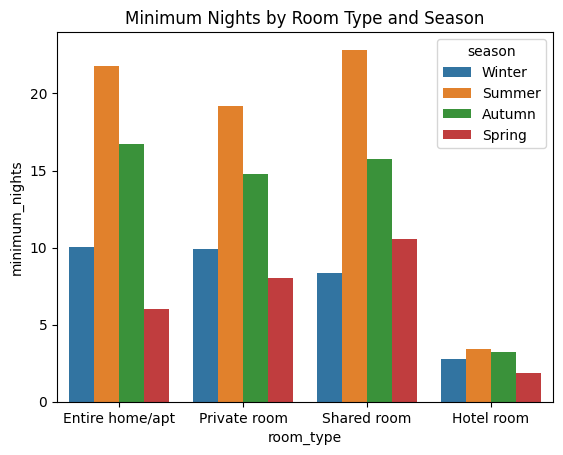

In [43]:
sns.barplot(x='room_type', y='minimum_nights', hue='season', data=df, ci=False)
plt.title('Minimum Nights by Room Type and Season')
plt.show()


6) What is the distribution of room types across cities?

room_type           Entire home/apt  Hotel room  Private room  Shared room
city                                                                      
Asheville                    2740.0        14.0         386.0          7.0
Austin                      11816.0         6.0        2382.0        107.0
Boston                       2526.0        19.0        1297.0         10.0
Broward County              14338.0        51.0        2338.0        107.0
Cambridge                     601.0         NaN         408.0          1.0
Chicago                      6029.0        29.0        1549.0         72.0
Clark County                 9919.0       251.0        3403.0         62.0
Columbus                     1942.0         6.0         384.0          5.0
Denver                       4535.0        12.0         773.0         27.0
Jersey City                   852.0        11.0         447.0          2.0
Los Angeles                 29390.0        62.0       12042.0        673.0
Nashville                

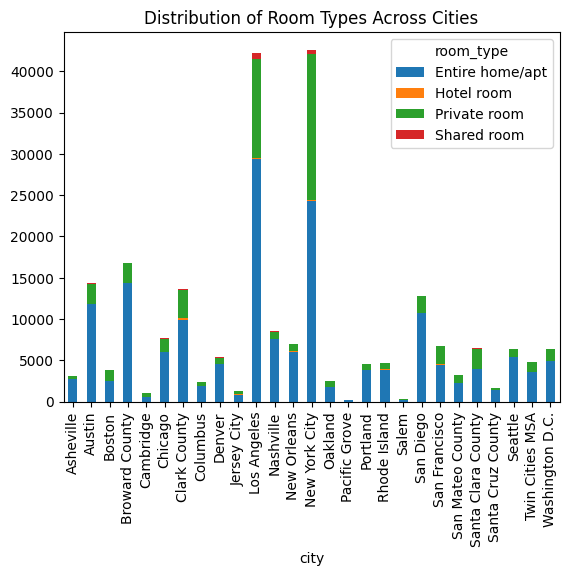

In [44]:
room_type_city = df.groupby('city')['room_type'].value_counts().unstack()
print(room_type_city)
room_type_city.plot(kind='bar', stacked=True)
plt.title('Distribution of Room Types Across Cities')
plt.show()


7) How does the price of accommodations vary over time by room type?

In [45]:
df.groupby([df['last_review'].dt.year, 'room_type'])['price'].median().unstack().reset_index()

room_type,last_review,Entire home/apt,Hotel room,Private room,Shared room
0,2010.0,150.0,NaN,NaN,NaN
1,2011.0,102.5,NaN,224.5,NaN
2,2012.0,200.0,NaN,90.0,NaN
3,2013.0,150.0,NaN,115.0,50.0
4,2014.0,177.0,NaN,80.0,30.0
5,2015.0,153.0,NaN,75.0,48.0
6,2016.0,150.0,1899.5,65.0,75.0
7,2017.0,150.0,261.5,65.0,50.0
8,2018.0,150.0,1663.0,69.0,41.5
9,2019.0,159.0,343.0,74.0,45.0


<ipython-input-46-58933b83b3e5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['last_review'] = pd.to_datetime(df['last_review'])
<ipython-input-46-58933b83b3e5>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(data=df, x=df_year, y='price', hue='room_type', ci=False)
<ipython-input-46-58933b83b3e5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['last_review'] = pd.to_datetime(df['last_review'])
<ipython-input-46-58933b83b3e5>:

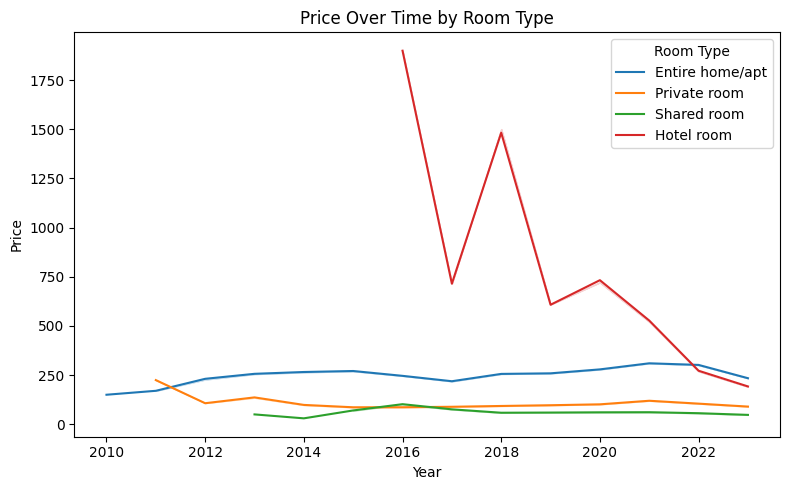

In [46]:
# Ensure 'last_review' is in datetime format
df['last_review'] = pd.to_datetime(df['last_review'])

# Extract the year and add it as a column
df_year = df['last_review'].dt.year

# Plot using Seaborn: No aggregation, just plot the raw price data
plt.figure(figsize=(8, 5))  # Optional: adjust the plot size
sns.lineplot(data=df, x=df_year, y='price', hue='room_type', ci=False)
plt.title('Price Over Time by Room Type')
plt.ylabel('Price')
plt.xlabel('Year')
plt.legend(title='Room Type')  # Adjusting the legend location
plt.tight_layout()  # To make sure everything fits
plt.show()


In [47]:
# latitude_l = df["latitude"].tolist()
# longitude_l = df["longitude"].tolist()
# locations = list(zip(latitude_l, longitude_l))

# # Initialize the map:
# usa_map = folium.Map(location = [35, -100], zoom_start = 5)
# plugins.FastMarkerCluster(data = locations).add_to(usa_map)
# usa_map

In [48]:

# import folium
# from folium import plugins

# # Extract latitude and longitude as lists
# latitude_l = df["latitude"].tolist()
# longitude_l = df["longitude"].tolist()

# # Combine them into a list of tuples (latitude, longitude)
# locations = list(zip(latitude_l, longitude_l))

# # Initialize the map (centered on the USA)
# usa_map = folium.Map(location=[35, -100], zoom_start=5)

# # Create the FastMarkerCluster with the location data
# marker_cluster = plugins.FastMarkerCluster(data=locations).add_to(usa_map)

# # Add markers with popups containing the required information
# for index, row in df.iterrows():
#     popup_text = f"""
#     <b>Room Type:</b> {row['room_type']}<br>
#     <b>Price:</b> ${row['price']}<br>
#     <b>Minimum Nights:</b> {row['minimum_nights']}<br>
#     <b>Availability (365 days):</b> {row['availability_365']}<br>
#     <b>City:</b> {row['city']}<br>
#     <b>Distance to City Center:</b> {row['distance_to_city_center']} km
#     """
#     folium.Marker(
#         location=[row['latitude'], row['longitude']],
#         popup=popup_text
#     ).add_to(marker_cluster)

# # Display the map
# display(usa_map)

# # Save the map as an HTML file
# usa_map.save("usa_map.html")

In [49]:
# import folium
# from folium import plugins

# # Filter out rows with null values in key columns
# df_clean = df.dropna(subset=['latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'availability_365', 'city', 'distance_to_city_center'])

# # Extract latitude and longitude as lists
# latitude_l = df_clean["latitude"].tolist()
# longitude_l = df_clean["longitude"].tolist()

# # Combine them into a list of tuples (latitude, longitude)
# locations = list(zip(latitude_l, longitude_l))

# # Initialize the map (centered on the USA)
# usa_map = folium.Map(location=[35, -100], zoom_start=5)

# # Create the FastMarkerCluster with the location data
# marker_cluster = plugins.FastMarkerCluster(data=locations).add_to(usa_map)

# # Add markers with popups containing the required information
# for index, row in df_clean.iterrows():
#     popup_text = f"""
#     <b>Room Type:</b> {row['room_type']}<br>
#     <b>Price:</b> ${row['price']}<br>
#     <b>Minimum Nights:</b> {row['minimum_nights']}<br>
#     <b>Availability (365 days):</b> {row['availability_365']}<br>
#     <b>City:</b> {row['city']}<br>
#     <b>Distance to City Center:</b> {row['distance_to_city_center']} km
#     """
#     folium.Marker(
#         location=[row['latitude'], row['longitude']],
#         popup=popup_text
#     ).add_to(marker_cluster)

# # Display the map (if you're running this in a Jupyter Notebook or other IPython environment)
# # display(usa_map)

# # Save the map as an HTML file
# usa_map.save("usa_map.html")


<Axes: >

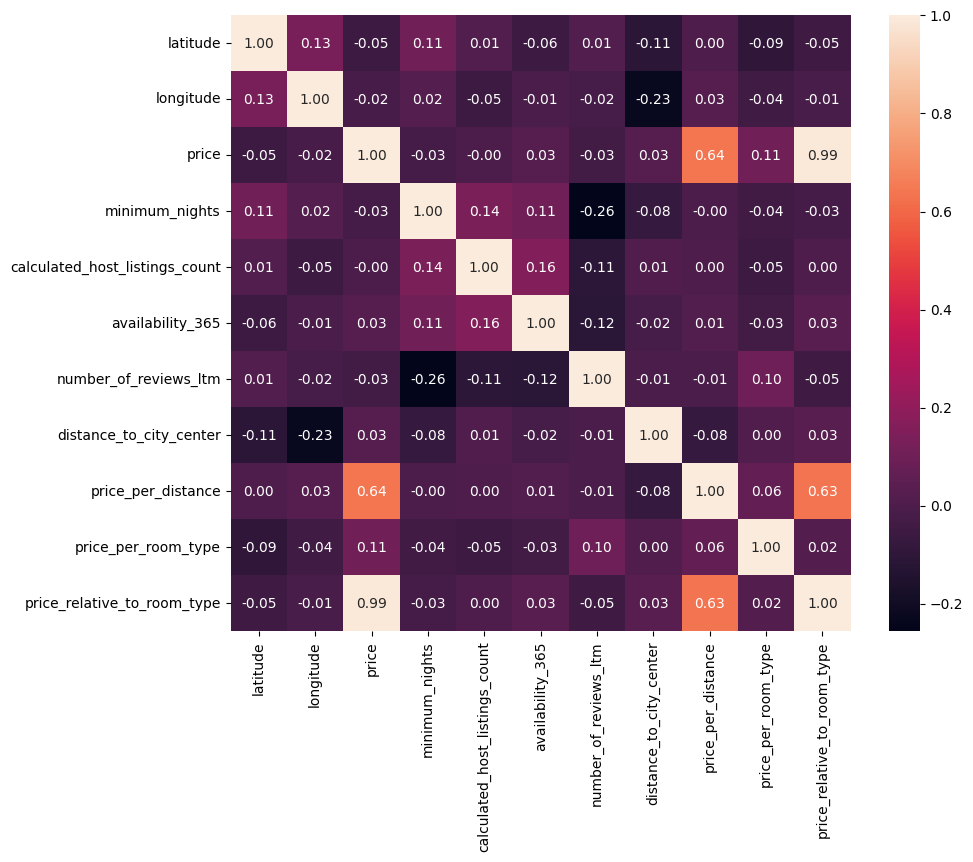

In [50]:
plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes(include=['number']).corr(), fmt=".2f", annot=True)

### 3) Pre-Processing Mind Map:
* a) Detect & Handle Duplicates
* b) train_test_split
* c) Detect & Handle NaNs
* d) Detect & Handle Outliers
* e) Encoding: (Ordinal:[OrdinalEncoder, LabelEncoder] - Nominal: [< 7 uniques(OneHotEncoding), > 7 uniques (BinaryEncoder)])
* f) Scaling: StandardScaler, MinMaxScaler, RobustScaler: X_train_resampled_scaled

In [31]:
# a) Detect & Handle Duplicates
df.duplicated().sum()

671

In [30]:
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True, drop=True)
df.duplicated().sum()

<ipython-input-30-417165daddaa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


0

In [37]:
# b) train_test_split
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)
X_train.shape, X_test.shape

((183902, 19), (45976, 19))

In [38]:
X_train

,neighbourhood,latitude,longitude,room_type,minimum_nights,last_review,calculated_host_listings_count,availability_365,number_of_reviews_ltm,city,distance_to_city_center,reviews_category,host_listings_category,availability_category,distance_category,season,price_per_distance,price_per_room_type,price_relative_to_room_type
1717,Chinatown,37.79143,-122.40824,Private room,2,2022-09-22,15,365.0,1,San Francisco,2.081491,1-10 Reviews,6-20,181-365 days,Very Close,Autumn,126.886640,75.0,5.213333
149831,Hale,39.73512,-104.92318,Entire home/apt,2,2023-03-24,1,121.0,35,Denver,5.771357,11-50 Reviews,1,31-180 days,Close,Spring,12.552876,177.0,0.480226
150997,Five Points,39.75426,-104.98770,Entire home/apt,30,2022-09-04,1,358.0,1,Denver,1.686892,1-10 Reviews,1,181-365 days,Very Close,Autumn,39.078607,177.0,0.593220
116907,<NA>,35.43403,-82.52393,Private room,1,2022-10-10,2,27.0,28,Asheville,18.044873,11-50 Reviews,2-5,1-30 days,Close,Autumn,2.310333,75.0,0.586667
15597,Ward C (councilmember Richard Boggiano),40.72832,-74.06308,Entire home/apt,28,2022-01-31,1,230.0,0,Jersey City,2.052860,No Reviews,1,181-365 days,Very Close,Winter,32.756171,177.0,0.564972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,Northland,40.06863,-82.97149,Entire home/apt,2,2023-03-26,1,76.0,28,Columbus,12.154218,11-50 Reviews,1,31-180 days,Close,Spring,19.005311,177.0,1.412429
103694,Flatiron District,40.74252,-73.98699,Entire home/apt,2,2023-02-12,53,354.0,3,New York City,3.670364,1-10 Reviews,51-100,181-365 days,Very Close,Winter,34.044457,177.0,0.898305
131932,Mission Bay,32.78937,-117.24114,Entire home/apt,1,2023-01-07,12,266.0,7,San Diego,11.091037,1-10 Reviews,6-20,181-365 days,Close,Winter,31.014709,177.0,2.118644
146867,District 11,36.25689,-86.65087,Entire home/apt,30,NaT,3,261.0,0,Nashville,15.730053,No Reviews,2-5,181-365 days,Close,None,17.931802,177.0,1.694915


In [39]:
# c) Detect & Handle NaNs (No NaNs)
X_train.isna().sum()

neighbourhood                     13886
latitude                              0
longitude                             0
room_type                             0
minimum_nights                        0
last_review                       38127
calculated_host_listings_count        0
availability_365                  29154
number_of_reviews_ltm                 0
city                                  0
distance_to_city_center               0
reviews_category                      0
host_listings_category                0
availability_category             29154
distance_category                    10
season                            38127
price_per_distance                    0
price_per_room_type                   0
price_relative_to_room_type           0
dtype: int64

In [40]:
from sklearn.base import BaseEstimator, TransformerMixin

class Handle_outliers_lb_ub(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        self.n_features_in_ = X.shape[1]
        q1 = np.percentile(X, 25)
        q3 = np.percentile(X, 75)
        iqr = q3 - q1
        ub_train = q3 + 1.5 * iqr
        lb_train = q1 - 1.5 * iqr
        self.ub_train = ub_train
        self.lb_train = lb_train
        return self # always return self

    def transform(self, X, y=None):
        assert self.n_features_in_ == X.shape[1]
        X[X > self.ub_train] = self.ub_train
        X[X < self.lb_train] = self.lb_train
        return X

h_lb_ub = Handle_outliers_lb_ub()
h_lb_ub

Handle_outliers_lb_ub()

In [41]:
from sklearn.base import BaseEstimator, TransformerMixin
class LogTransfomer(BaseEstimator, TransformerMixin):

    def fit(self, x, y=None):  # always return self
        # calculate what is needed to make .transform()
        # self.mean_ = np.mean(x)
        self.n_features_in_ = x.shape[1]
        return self # always return self

    def transform(self, x, y=None):
        assert self.n_features_in_ == x.shape[1]
        return np.log1p(x)

log_transformer = LogTransfomer()
log_transformer

LogTransfomer()

In [42]:
# c) Detect & Handle NaNs
# d) Detect & Handle Outliers
# e) Encoding: (Ordinal:[OrdinalEncoder, LabelEncoder] - Nominal: [< 7 uniques(OneHotEncoding), > 7 uniques (BinaryEncoder)])
# f) Scaling: StandardScaler, MinMaxScaler, RobustScaler: X_train_resampled_scaled

"""
column KNNImputer   :
['last_review','availability_365', 'latitude', 'longitude']

column SimpleImputer('most_frequent'):
['distance_category', 'reviews_category', 'season', 'neighbourhood', 'city',
'room_type', 'availability_category','host_listings_category']

column SimpleImputer('median'):
['minimum_nights', 'calculated_host_listings_count','number_of_reviews_ltm',
'distance_to_city_center', 'price_per_distance', 'price_relative_to_room_type', 'price_per_room_type']

column LogTransfomer :
['minimum_nights', 'calculated_host_listings_count','number_of_reviews_ltm',
'distance_to_city_center', 'price_per_distance', 'price_relative_to_room_type']

column Handle_outliers_lb_ub :
['availability_365', 'latitude', 'longitude', 'price_per_room_type']

column OrdinalEncoder: ['distance_category', 'reviews_category', 'season']

column LabelEncoder: ['availability_category','host_listings_category']

column OneHotEncoder:['room_type']

column BinaryEncoder: ['neighbourhood', 'city']

column RobustScaler :
['minimum_nights', 'calculated_host_listings_count','number_of_reviews_ltm',
'distance_to_city_center', 'price_per_distance', 'availability_365', 'latitude',
'longitude', 'price_per_room_type', 'price_relative_to_room_type']
"""

# Replace pd.NA with NaN before applying SimpleImputer or KNNImputer
def replace_pdna(X):
    """Replaces pd.NA values with np.nan."""
    return X.fillna(pd.NA).replace({pd.NA: float('nan')})

# Define pipelines with consistent preprocessing steps
num_knn_lb_ub_ro_pipeline = Pipeline(steps=[
    ('impute', KNNImputer(n_neighbors=5)),
    # Assuming 'h_lb_ub' is defined elsewhere and handles outliers
    ('handle_outliers', h_lb_ub),
    ('scale', RobustScaler())
])

date_knn_pipeline = Pipeline(steps=[
    ('knn_imputer', KNNImputer(n_neighbors=5))
])

cat_si_ohe_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('encode', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'))
])

cat_si_bi_pipeline = Pipeline(steps=[('replace_pdna', FunctionTransformer(replace_pdna)),
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('encode', BinaryEncoder())
])

cat_si_or_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('encode', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

# Applying LabelEncoder with reshape for 2D output (if necessary)
cat_si_la_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('encode', FunctionTransformer(lambda x: LabelEncoder().fit_transform(x.astype(str)).reshape(-1, 1)))
])

num_si_lb_ub_ro_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='median')),
    # Assuming 'h_lb_ub' is defined elsewhere and handles outliers
    ('handle_outliers', h_lb_ub),
    ('scale', RobustScaler())
])

num_si_log_ro_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='median')),
    # Assuming 'log_transformer' is defined elsewhere and performs log transformation
    ('log_transform', log_transformer),
    ('scale', RobustScaler())
])

target_pipeline = Pipeline(steps=[
    # Assuming 'log_transformer' is defined elsewhere and performs log transformation
    ('handle_outliers', log_transformer)
])



In [43]:
# Define the column transformer with the necessary pipelines
pre_processing = ColumnTransformer(transformers=[
    ("num_knn_lb_ub_ro_pipeline", num_knn_lb_ub_ro_pipeline, ['availability_365', 'latitude', 'longitude']),
    ("date_knn_pipeline", date_knn_pipeline, ['last_review']),
    ("cat_si_ohe_pipeline", cat_si_ohe_pipeline, ['room_type']),
    # Use SimpleImputer with strategy='most_frequent' for 'neighbourhood' and 'city'
    # Preprocessing step to replace pd.NA with NaN is added.
    ("cat_si_bi_pipeline", cat_si_bi_pipeline, ['neighbourhood', 'city']),
    ("cat_si_or_pipeline", cat_si_or_pipeline, ['distance_category', 'reviews_category', 'season']),
    ("cat_si_la_pipeline_availability", cat_si_la_pipeline, ['availability_category']),
    ("cat_si_la_pipeline_host_listings", cat_si_la_pipeline, ['host_listings_category']),
    ("num_si_lb_ub_minmax_pipeline", num_si_lb_ub_ro_pipeline, ['price_per_room_type']),
    ("num_si_log_ro_pipeline", num_si_log_ro_pipeline, ['minimum_nights', 'calculated_host_listings_count',
     'number_of_reviews_ltm', 'distance_to_city_center', 'price_per_distance', 'price_relative_to_room_type'])
])
pre_processing

ColumnTransformer(transformers=[('num_knn_lb_ub_ro_pipeline',
                                 Pipeline(steps=[('impute', KNNImputer()),
                                                 ('handle_outliers',
                                                  Handle_outliers_lb_ub()),
                                                 ('scale', RobustScaler())]),
                                 ['availability_365', 'latitude', 'longitude']),
                                ('date_knn_pipeline',
                                 Pipeline(steps=[('knn_imputer',
                                                  KNNImputer())]),
                                 ['last_review']),
                                ('cat_si_ohe_pipeline',
                                 Pipeline(steps=[('impute'...
                                                 ('scale', RobustScaler())]),
                                 ['price_per_room_type']),
                                ('num_si_log_ro_pipeline',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('log_transform',
                                                  LogTransfomer()),
                                                 ('scale', RobustScaler())]),
                                 ['minimum_nights',
                                  'calculated_host_listings_count',
                                  'number_of_reviews_ltm',
                                  'distance_to_city_center',
                                  'price_per_distance',
                                  'price_relative_to_room_type'])])

# 4) Modeling

* 1) Make Simple Model

* 2) Get validation accuracy to invstigate (Underfitting vs Overfitting)

* 3) Hyperparameters tunning (using GridSearchCV or RandomizedSearchCV)

* 4) Get Test Score & confidence interval

* 5) save model

* 6) put it in backend (streamlit / flaskapp)

In [44]:
X_train_preprocessed = pre_processing.fit_transform(X_train)
X_test_preprocessed = pre_processing.transform(X_test)
y_train_preprocessed = target_pipeline.fit_transform(np.array(y_train).reshape(-1, 1))
y_test_preprocessed = target_pipeline.transform(np.array(y_test).reshape(-1, 1))
X_train_preprocessed

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

array([[ 0.70821256,  0.23713718, -0.59774902, ..., -0.80283595,
         1.29910045,  2.63968546],
       [-0.4705314 ,  0.52531063, -0.17429119, ..., -0.24870255,
        -0.0967602 , -0.70082437],
       [ 0.67439614,  0.52814835, -0.17585375, ..., -0.89928345,
         0.57752038, -0.52952008],
       ...,
       [ 0.22995169, -0.5044733 , -0.47261082, ...,  0.15936419,
         0.43781448,  1.03452244],
       [ 0.2057971 ,  0.00962473,  0.26823248, ...,  0.38793433,
         0.11110307,  0.69446045],
       [ 0.51980676,  0.78658805,  0.63974214, ...,  0.73481063,
        -0.97520619, -0.19416978]])

In [45]:
lr_model = LinearRegression()
lr_model.fit(X_train_preprocessed, y_train_preprocessed)
y_train_pred = lr_model.predict(X_train_preprocessed)
print(f"Train Accuracy: {lr_model.score(X_train_preprocessed, y_train_preprocessed)}")
print(f"Train Loss: {mean_squared_error(y_train_preprocessed, y_train_pred)}")
valid_accuracies = cross_val_score(lr_model, X_train_preprocessed, y_train_preprocessed, cv=5, scoring='r2')
pd.DataFrame(valid_accuracies).describe()

Train Accuracy: 0.005487384158119446
Train Loss: 0.6274360270544361


,0
count,5.000000
mean,0.005449
std,0.000578
min,0.004670
25%,0.005320
50%,0.005365
75%,0.005620
max,0.006270


In [ ]:

# Replace pd.NA with NaN before applying SimpleImputer or KNNImputer
def replace_pdna(X):
    """Replaces pd.NA values with np.nan."""
    return X.fillna(pd.NA).replace({pd.NA: float('nan')})

# Define pipelines with consistent preprocessing steps
num_knn_lb_ub_ro_pipeline = Pipeline(steps=[
    ('impute', KNNImputer(n_neighbors=5)),
    ('poly', PolynomialFeatures(degree=5, include_bias=True)),
    # Assuming 'h_lb_ub' is defined elsewhere and handles outliers
    ('handle_outliers', h_lb_ub),
    ('scale', RobustScaler())
])

date_knn_pipeline = Pipeline(steps=[
    ('knn_imputer', KNNImputer(n_neighbors=5))
])

cat_si_ohe_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('encode', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'))
])

cat_si_bi_pipeline = Pipeline(steps=[('replace_pdna', FunctionTransformer(replace_pdna)),
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('encode', BinaryEncoder())
])

cat_si_or_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('encode', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

# Applying LabelEncoder with reshape for 2D output (if necessary)
cat_si_la_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('encode', FunctionTransformer(lambda x: LabelEncoder().fit_transform(x.astype(str)).reshape(-1, 1)))
])

num_si_lb_ub_ro_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='median')),
    ('poly', PolynomialFeatures(degree=5, include_bias=True)),
    # Assuming 'h_lb_ub' is defined elsewhere and handles outliers
    ('handle_outliers', h_lb_ub),
    ('scale', RobustScaler())
])

num_si_log_ro_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='median')),
    ('poly', PolynomialFeatures(degree=5, include_bias=True)),
    # Assuming 'log_transformer' is defined elsewhere and performs log transformation
    ('log_transform', log_transformer),
    ('scale', RobustScaler())
])

target_pipeline = Pipeline(steps=[
    # Assuming 'log_transformer' is defined elsewhere and performs log transformation
    ('handle_outliers', log_transformer)
])



In [43]:
# Pre-processing steps
pre_processing_poly = ColumnTransformer(transformers=[
    ("num_knn_lb_ub_minmax_pipeline", num_knn_lb_ub_ro_pipeline, ['availability_365', 'latitude', 'longitude']),
    ("date_knn_pipeline", date_knn_pipeline, ['last_review']),
    ("cat_si_ohe_pipeline", cat_si_ohe_pipeline, ['room_type']),
    # Use SimpleImputer with strategy='most_frequent' for 'neighbourhood' and 'city'
    # Preprocessing step to replace pd.NA with NaN is added.
    ("cat_si_bi_pipeline", Pipeline(steps=[('replace_pdna', FunctionTransformer(replace_pdna)),
                                            ('impute', SimpleImputer(strategy='most_frequent')),
                                            ('encode', BinaryEncoder())]), ['neighbourhood', 'city']),
    ("cat_si_or_pipeline", cat_si_or_pipeline, ['distance_category', 'reviews_category', 'season']),
    ("cat_si_la_pipeline_availability", cat_si_la_pipeline, ['availability_category']),
    ("cat_si_la_pipeline_host_listings", cat_si_la_pipeline, ['host_listings_category']),
    ("num_si_lb_ub_minmax_pipeline", num_si_lb_ub_ro_pipeline, ['price_per_room_type']),
    ("num_si_log_ro_pipeline", num_si_log_ro_pipeline, ['minimum_nights', 'calculated_host_listings_count',
     'number_of_reviews_ltm', 'distance_to_city_center', 'price_per_distance', 'price_relative_to_room_type'])
])
pre_processing_poly

ColumnTransformer(transformers=[('num_knn_lb_ub_minmax_pipeline',
                                 Pipeline(steps=[('impute', KNNImputer()),
                                                 ('poly',
                                                  PolynomialFeatures(degree=5)),
                                                 ('handle_outliers',
                                                  Handle_outliers_lb_ub()),
                                                 ('scale', RobustScaler())]),
                                 ['availability_365', 'latitude', 'longitude']),
                                ('date_knn_pipeline',
                                 Pipeline(steps=[('knn_imputer',
                                                  KNNImputer())]),
                                 ['last_review']),
                                ('cat_...
                                 ['price_per_room_type']),
                                ('num_si_log_ro_pipeline',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('poly',
                                                  PolynomialFeatures(degree=5)),
                                                 ('log_transform',
                                                  LogTransfomer()),
                                                 ('scale', RobustScaler())]),
                                 ['minimum_nights',
                                  'calculated_host_listings_count',
                                  'number_of_reviews_ltm',
                                  'distance_to_city_center',
                                  'price_per_distance',
                                  'price_relative_to_room_type'])])

In [44]:
X_train_preprocessed_poly = pre_processing_poly.fit_transform(X_train)
X_test_preprocessed_poly = pre_processing_poly.transform(X_test)
y_train_preprocessed = target_pipeline.fit_transform(np.array(y_train).reshape(-1, 1))
y_test_preprocessed = target_pipeline.transform(np.array(y_test).reshape(-1, 1))
X_train_preprocessed_poly

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

array([[ 0.        ,  0.70821256,  0.23713718, ...,  1.83060786,
         2.18281937,  3.34089598],
       [ 0.        , -0.4705314 ,  0.52531063, ..., -0.48101692,
        -0.54604359, -0.29504354],
       [ 0.        ,  0.67439614,  0.52814835, ...,  0.08137507,
        -0.23334081, -0.27486887],
       ...,
       [ 0.        ,  0.22995169, -0.5044733 , ...,  0.74255153,
         0.93300818,  1.3622468 ],
       [ 0.        ,  0.2057971 ,  0.00962473, ...,  0.39464367,
         0.57487715,  0.88967453],
       [ 0.        ,  0.51980676,  0.78658805, ..., -0.77580731,
        -0.48319229, -0.15184479]])

In [45]:
lr_model = LinearRegression()
lr_model.fit(X_train_preprocessed_poly, y_train_preprocessed)
y_train_pred = lr_model.predict(X_train_preprocessed_poly)
print(f"Train Accuracy: {lr_model.score(X_train_preprocessed_poly, y_train_preprocessed)}")
print(f"Train Loss: {mean_squared_error(y_train_preprocessed, y_train_pred)}")
valid_accuracies = cross_val_score(lr_model, X_train_preprocessed_poly, y_train_preprocessed, cv=5, scoring='r2')
pd.DataFrame(valid_accuracies).describe()

Train Accuracy: 0.01928289139656958
Train Loss: 0.6187324690351479


,0
count,5.000000
mean,0.013336
std,0.008107
min,-0.000553
25%,0.013424
50%,0.016029
75%,0.018167
max,0.019611


In [46]:
# Create and train the Lasso model
lasso_reg = Lasso(alpha=0.1, random_state=42)  # You can adjust alpha
lasso_reg.fit(X_train_preprocessed, y_train_preprocessed)

# Predictions on training data
y_train_pred_lasso = lasso_reg.predict(X_train_preprocessed)

# Print Train Accuracy (R^2 score) and Train Loss (Mean Squared Error)
train_accuracy_lasso = lasso_reg.score(X_train_preprocessed, y_train_preprocessed)  # R^2 score
train_loss_lasso = mean_squared_error(y_train_preprocessed, y_train_pred_lasso)  # MSE

print(f"Lasso Train Accuracy (R²): {train_accuracy_lasso}")
print(f"Lasso Train Loss (MSE): {train_loss_lasso}")

# Cross-validation with 5 folds (using R² as the scoring metric)
valid_accuracies_lasso = cross_val_score(lasso_reg, X_train_preprocessed, y_train_preprocessed, cv=5, scoring='r2')

# Display cross-validation results summary
print("Lasso Cross-validation R² scores:")
print(pd.DataFrame(valid_accuracies_lasso).describe())


Lasso Train Accuracy (R²): 0.8756389538316883
Lasso Train Loss (MSE): 0.07845913614894223
Lasso Cross-validation R² scores:
              0
count  5.000000
mean   0.875625
std    0.001157
min    0.874315
25%    0.874612
50%    0.875793
75%    0.876344
max    0.877061


In [47]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Define the parameter grid with larger alpha values
lasso_param_grid = {"alpha": [0.1, 0.5, 1.0, 2.0]}

# Configure the Lasso model with increased iterations
lasso_model = Lasso(max_iter=5000)

# Perform GridSearchCV
lasso_grid_search = GridSearchCV(
    estimator=lasso_model,
    param_grid=lasso_param_grid,
    cv=5,
    scoring="r2",
    verbose=1,
    n_jobs=-1
)

# Fit the model
lasso_grid_search.fit(X_train_preprocessed, y_train_preprocessed.ravel())

# Output the results
print("Lasso Best Params:", lasso_grid_search.best_params_)
print("Lasso Best Score:", lasso_grid_search.best_score_)


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Lasso Best Params: {'alpha': 0.1}
Lasso Best Score: 0.8756251891183625


In [48]:
# Create and train the Ridge model
ridge_reg = Ridge(alpha=1.0, random_state=42)  # You can adjust alpha
ridge_reg.fit(X_train_preprocessed, y_train_preprocessed)

# Predictions on training data
y_train_pred_ridge = ridge_reg.predict(X_train_preprocessed)

# Print Train Accuracy (R^2 score) and Train Loss (Mean Squared Error)
train_accuracy_ridge = ridge_reg.score(X_train_preprocessed, y_train_preprocessed)  # R^2 score
train_loss_ridge = mean_squared_error(y_train_preprocessed, y_train_pred_ridge)  # MSE

print(f"Ridge Train Accuracy (R²): {train_accuracy_ridge}")
print(f"Ridge Train Loss (MSE): {train_loss_ridge}")

# Cross-validation with 5 folds (using R² as the scoring metric)
valid_accuracies_ridge = cross_val_score(ridge_reg, X_train_preprocessed, y_train_preprocessed, cv=5, scoring='r2')

# Display cross-validation results summary
print("Ridge Cross-validation R² scores:")
print(pd.DataFrame(valid_accuracies_ridge).describe())


Ridge Train Accuracy (R²): 0.985851932318477
Ridge Train Loss (MSE): 0.008925987700093117


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.275e-43): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.8479e-43): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.84024e-43): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.84964e-43): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ridge Cross-validation R² scores:
              0
count  5.000000
mean   0.985841
std    0.000192
min    0.985653
25%    0.985702
50%    0.985843
75%    0.985861
max    0.986144


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.83789e-43): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.84216e-43): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [49]:
# Ridge
ridge_param_grid = {"alpha": [0.1, 0.2, 0.5, 0.8, 1, 5, 10, 50]}
ridge_model = Ridge()
ridge_grid_search = GridSearchCV(
    estimator=ridge_model,
    param_grid=ridge_param_grid,
    cv=5,
    scoring="r2",
    verbose=1,
    n_jobs=-1
)
ridge_grid_search.fit(X_train_preprocessed, y_train_preprocessed.ravel())
print("Ridge Best Params:", ridge_grid_search.best_params_)
print("Ridge Best Score:", ridge_grid_search.best_score_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Ridge Best Params: {'alpha': 0.1}
Ridge Best Score: 0.9858408182482753


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.27554e-44): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [50]:
# Create and train the ElasticNet model
elasticnet_reg = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)  # You can adjust alpha and l1_ratio
elasticnet_reg.fit(X_train_preprocessed, y_train_preprocessed)

# Predictions on training data
y_train_pred_elasticnet = elasticnet_reg.predict(X_train_preprocessed)

# Print Train Accuracy (R^2 score) and Train Loss (Mean Squared Error)
train_accuracy_elasticnet = elasticnet_reg.score(X_train_preprocessed, y_train_preprocessed)  # R^2 score
train_loss_elasticnet = mean_squared_error(y_train_preprocessed, y_train_pred_elasticnet)  # MSE

print(f"ElasticNet Train Accuracy (R²): {train_accuracy_elasticnet}")
print(f"ElasticNet Train Loss (MSE): {train_loss_elasticnet}")

# Cross-validation with 5 folds (using R² as the scoring metric)
valid_accuracies_elasticnet = cross_val_score(elasticnet_reg, X_train_preprocessed, y_train_preprocessed, cv=5, scoring='r2')

# Display cross-validation results summary
print("ElasticNet Cross-validation R² scores:")
print(pd.DataFrame(valid_accuracies_elasticnet).describe())


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.711e+04, tolerance: 1.160e+01
  model = cd_fast.enet_coordinate_descent(


ElasticNet Train Accuracy (R²): 0.9222345808232271
ElasticNet Train Loss (MSE): 0.04906204795521159
ElasticNet Cross-validation R² scores:
              0
count  5.000000
mean   0.922223
std    0.000848
min    0.921351
25%    0.921510
50%    0.922240
75%    0.922574
max    0.923442


In [51]:
# ElasticNet
elasticnet_param_grid = {"alpha": [0.1, 0.3, 0.5], "l1_ratio": [0.2, 0.1, 0.3]}
elasticnet_model = ElasticNet(max_iter=5000, random_state=42)
elasticnet_grid_search = GridSearchCV(
    estimator=elasticnet_model,
    param_grid=elasticnet_param_grid,
    cv=5,
    scoring="r2",
    verbose=1,
    n_jobs=-1
)
elasticnet_grid_search.fit(X_train_preprocessed, y_train_preprocessed.ravel())
print("ElasticNet Best Params:", elasticnet_grid_search.best_params_)
print("ElasticNet Best Score:", elasticnet_grid_search.best_score_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
ElasticNet Best Params: {'alpha': 0.1, 'l1_ratio': 0.1}
ElasticNet Best Score: 0.9538777515948395


In [46]:
# Another Complex Model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

In [53]:
# svm_reg = SVR()
# svm_reg.fit(X_train_preprocessed, y_train_preprocessed)
# y_train_pred = svm_reg.predict(X_train_preprocessed)
# print(f"Train Accuracy: {svm_reg.score(X_train_preprocessed, y_train_preprocessed)}")
# print(f"Train Loss: {mean_squared_error(y_train_preprocessed, y_train_pred)}")
# valid_accuracies = cross_val_score(svm_reg, X_train_preprocessed, y_train_preprocessed, cv=5, scoring='r2')
# pd.DataFrame(valid_accuracies).describe()

In [54]:
knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train_preprocessed, y_train_preprocessed)
y_train_pred = knn_reg.predict(X_train_preprocessed)
print(f"Train Accuracy: {knn_reg.score(X_train_preprocessed, y_train_preprocessed)}")
print(f"Train Loss: {mean_squared_error(y_train_preprocessed, y_train_pred)}")
valid_accuracies = cross_val_score(knn_reg, X_train_preprocessed, y_train_preprocessed, cv=5, scoring='r2')
pd.DataFrame(valid_accuracies).describe()

Train Accuracy: -0.07320206974705301
Train Loss: 0.6770810466779925


,0
count,5.000000
mean,-0.099155
std,0.008027
min,-0.103610
25%,-0.102913
50%,-0.102785
75%,-0.101615
max,-0.084853


In [55]:
# KNeighborsRegressor
knn_param_grid = {"n_neighbors": [50,25,15], "weights": ["uniform", "distance"]}
knn_model = KNeighborsRegressor()
knn_grid_search = GridSearchCV(
    estimator=knn_model,
    param_grid=knn_param_grid,
    cv=5,
    scoring="r2",
    verbose=1,
    n_jobs=-1
)
knn_grid_search.fit(X_train_preprocessed, y_train_preprocessed.ravel())
print("KNeighborsRegressor Best Params:", knn_grid_search.best_params_)
print("KNeighborsRegressor Best Score:", knn_grid_search.best_score_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
KNeighborsRegressor Best Params: {'n_neighbors': 50, 'weights': 'uniform'}
KNeighborsRegressor Best Score: 0.018053268224189976


In [56]:
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train_preprocessed, y_train_preprocessed)
y_train_pred = dt_reg.predict(X_train_preprocessed)
print(f"Train Accuracy: {dt_reg.score(X_train_preprocessed, y_train_preprocessed)}")
print(f"Train Loss: {mean_squared_error(y_train_preprocessed, y_train_pred)}")
valid_accuracies = cross_val_score(dt_reg, X_train_preprocessed, y_train_preprocessed, cv=5, scoring='r2')
pd.DataFrame(valid_accuracies).describe()

Train Accuracy: 1.0
Train Loss: 2.0875295908582807e-27


,0
count,5.000000
mean,0.999967
std,0.000011
min,0.999955
25%,0.999957
50%,0.999967
75%,0.999972
max,0.999983


In [57]:
# DecisionTreeRegressor
decision_tree_param_grid = {"max_depth": [None, 1, 10], "min_samples_split": [2, 3, 4, 0.1, 0.2]}
decision_tree_model = DecisionTreeRegressor()
decision_tree_grid_search = GridSearchCV(
    estimator=decision_tree_model,
    param_grid=decision_tree_param_grid,
    cv=5,
    scoring="r2",
    verbose=1,
    n_jobs=-1
)
decision_tree_grid_search.fit(X_train_preprocessed, y_train_preprocessed.ravel())
print("DecisionTreeRegressor Best Params:", decision_tree_grid_search.best_params_)
print("DecisionTreeRegressor Best Score:", decision_tree_grid_search.best_score_)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
DecisionTreeRegressor Best Params: {'max_depth': None, 'min_samples_split': 2}
DecisionTreeRegressor Best Score: 0.9999649384183392


In [58]:
# # Ensure y_train_preprocessed is 1-dimensional
# y_train_preprocessed = y_train_preprocessed.ravel()

# rf_reg = RandomForestRegressor( random_state=42)
# rf_reg.fit(X_train_preprocessed, y_train_preprocessed)
# y_train_pred = rf_reg.predict(X_train_preprocessed)
# print(f"Train Accuracy: {rf_reg.score(X_train_preprocessed, y_train_preprocessed)}")
# print(f"Train Loss: {mean_squared_error(y_train_preprocessed, y_train_pred)}")
# valid_accuracies = cross_val_score(rf_reg, X_train_preprocessed, y_train_preprocessed, cv=5, scoring='r2')
# pd.DataFrame(valid_accuracies).describe()

# # Train Accuracy: 0.999996281204526
# # Train Loss: 2.3461806522027723e-06
# # mean	0.999967

In [59]:
# # RandomForestRegressor
# random_forest_param_grid = {"n_estimators": [180, 190, 200], "max_depth": [40, 50, 60]}
# random_forest_model = RandomForestRegressor()
# random_forest_grid_search = GridSearchCV(
#     estimator=random_forest_model,
#     param_grid=random_forest_param_grid,
#     cv=5,
#     scoring="r2",
#     verbose=1,
#     n_jobs=-1
# )
# random_forest_grid_search.fit(X_train_preprocessed, y_train_preprocessed.ravel())
# print("RandomForestRegressor Best Params:", random_forest_grid_search.best_params_)
# print("RandomForestRegressor Best Score:", random_forest_grid_search.best_score_)


In [47]:
gb_reg = GradientBoostingRegressor(n_estimators=300, min_samples_leaf=5, random_state=42)
gb_reg.fit(X_train_preprocessed, y_train_preprocessed)
y_train_pred = gb_reg.predict(X_train_preprocessed)
print(f"Train Accuracy: {gb_reg.score(X_train_preprocessed, y_train_preprocessed)}")
print(f"Train Loss: {mean_squared_error(y_train_preprocessed, y_train_pred)}")
valid_accuracies = cross_val_score(gb_reg, X_train_preprocessed, y_train_preprocessed, cv=5, scoring='r2')
pd.DataFrame(valid_accuracies).describe()

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Accuracy: 0.9998485373188847
Train Loss: 9.555750361751667e-05


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

,0
count,5.000000
mean,0.999852
std,0.000008
min,0.999842
25%,0.999846
50%,0.999854
75%,0.999856
max,0.999862


In [ ]:
# # GradientBoostingRegressor
# gradient_boosting_model = GradientBoostingRegressor()
# gradient_boosting_param_grid = {"n_estimators": [150, 200, 220, 250], "learning_rate": [0.1, 0.2, 0.4, 0.8]}
# gradient_boosting_grid_search = GridSearchCV(
#     estimator=gradient_boosting_model,
#     param_grid=gradient_boosting_param_grid,
#     cv=5,
#     scoring="r2",
#     verbose=1,
#     n_jobs=-1
# )
# gradient_boosting_grid_search.fit(X_train_preprocessed, y_train_preprocessed.ravel())
# print("GradientBoostingRegressor Best Params:", gradient_boosting_grid_search.best_params_)
# print("GradientBoostingRegressor Best Score:", gradient_boosting_grid_search.best_score_)

In [62]:
# Define the model
xgb_reg = XGBRegressor()

# Fit the model
xgb_reg.fit(X_train_preprocessed, y_train_preprocessed)

# Predictions and train metrics
y_train_pred = xgb_reg.predict(X_train_preprocessed)
train_score = xgb_reg.score(X_train_preprocessed, y_train_preprocessed)
train_loss = mean_squared_error(y_train_preprocessed, y_train_pred)

print(f"Train Accuracy: {train_score}")
print(f"Train Loss: {train_loss}")

# Manual cross-validation as a workaround
kf = KFold(n_splits=5, shuffle=True, random_state=42)
valid_accuracies = []

for train_idx, valid_idx in kf.split(X_train_preprocessed):
    X_train_cv, X_valid_cv = X_train_preprocessed[train_idx], X_train_preprocessed[valid_idx]
    y_train_cv, y_valid_cv = y_train_preprocessed[train_idx], y_train_preprocessed[valid_idx]
    
    xgb_reg.fit(X_train_cv, y_train_cv)
    valid_score = xgb_reg.score(X_valid_cv, y_valid_cv)
    valid_accuracies.append(valid_score)

valid_accuracies_df = pd.DataFrame(valid_accuracies, columns=["Validation Accuracy"])
print(valid_accuracies_df.describe())


Train Accuracy: 0.9998703253115212
Train Loss: 8.181150249140419e-05
       Validation Accuracy
count             5.000000
mean              0.999108
std               0.000216
min               0.998850
25%               0.998916
50%               0.999158
75%               0.999301
max               0.999315


In [63]:
# Initialize a list to store results
results = []

# Iterate over the parameter grid manually
for n_estimators in [200, 100, 150]:
    for learning_rate in [0.3, 0.1, 0.5]:
        for max_depth in [15,10,8]:
            model = XGBRegressor(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth, eval_metric="rmse")
            model.fit(X_train_preprocessed, y_train_preprocessed.ravel())
            
            # Make predictions and evaluate
            y_pred = model.predict(X_test_preprocessed)
            score = r2_score(y_test_preprocessed, y_pred)
            
            # Append the results
            results.append((n_estimators, learning_rate, max_depth, score))

# Find the best parameters based on R2 score
best_result = max(results, key=lambda x: x[3])
print(f"Best_xgb_reg_Parameters: n_estimators={best_result[0]}, learning_rate={best_result[1]}, max_depth={best_result[2]}")
print(f"Best_xgb_reg_Score: {best_result[3]}")


Best_xgb_reg_Parameters: n_estimators=100, learning_rate=0.3, max_depth=10
Best_xgb_reg_Score: 0.9992575615241971


In [48]:
# Create the pipeline with preprocessing + model
gb_reg_pipeline = Pipeline(steps=[
    ('preprocessor', pre_processing),
    ('model', GradientBoostingRegressor(random_state=42))
])
gb_reg_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_knn_lb_ub_ro_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   KNNImputer()),
                                                                  ('handle_outliers',
                                                                   Handle_outliers_lb_ub()),
                                                                  ('scale',
                                                                   RobustScaler())]),
                                                  ['availability_365',
                                                   'latitude', 'longitude']),
                                                 ('date_knn_pipeline',
                                                  Pipeline(steps=[('knn_imputer',
                                                                   KNNImputer())]),
                                                  ['last_review']),
                                                 ('cat_si_ohe_pip...
                                                 ('num_si_log_ro_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('log_transform',
                                                                   LogTransfomer()),
                                                                  ('scale',
                                                                   RobustScaler())]),
                                                  ['minimum_nights',
                                                   'calculated_host_listings_count',
                                                   'number_of_reviews_ltm',
                                                   'distance_to_city_center',
                                                   'price_per_distance',
                                                   'price_relative_to_room_type'])])),
                ('model', GradientBoostingRegressor(random_state=42))])

In [49]:
gb_reg_pipeline.steps

[('preprocessor',
  ColumnTransformer(transformers=[('num_knn_lb_ub_ro_pipeline',
                                   Pipeline(steps=[('impute', KNNImputer()),
                                                   ('handle_outliers',
                                                    Handle_outliers_lb_ub()),
                                                   ('scale', RobustScaler())]),
                                   ['availability_365', 'latitude', 'longitude']),
                                  ('date_knn_pipeline',
                                   Pipeline(steps=[('knn_imputer',
                                                    KNNImputer())]),
                                   ['last_review']),
                                  ('cat_si_ohe_pipeline',
                                   Pipeline(steps=[('impute'...
                                                   ('scale', RobustScaler())]),
                                   ['price_per_room_type']),
                     

In [ ]:
# Define hyperparameters for GridSearch
param_grid = {
    'model__n_estimators': [200, 250, 300],
    'model__learning_rate': [0.1, 0.2],
    'model__max_depth': [5, 7]
}


# GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(
    estimator=gb_reg_pipeline,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='neg_mean_squared_error',
    n_jobs=-1,  # Utilize all CPU cores
    verbose=3  # Display detailed progress
)

# Fit the GridSearchCV
grid_search.fit(X_train, y_train_preprocessed)

## Print the best parameters and the best score
print("Best Parameters:", grid_search.best_params_)
print("Best Mean Squared Error:", grid_search.best_score_)

# Best Parameters: {'model__learning_rate': 0.1, 'model__max_depth': 7, 'model__n_estimators': 300}
# Best Mean Squared Error: -5.867207501604477e-06

Fitting 5 folds for each of 12 candidates, totalling 60 fits


# Test Accuracy

In [ ]:
y_train_pred = grid_search.predict(X_train)
y_test_pred = grid_search.predict(X_test)

y_train_preprocessed = target_pipeline.fit_transform(np.array(y_train).reshape(-1, 1))
y_test_preprocessed = target_pipeline.transform(np.array(y_test).reshape(-1, 1))

print(f"Train Accuracy: {r2_score(y_true=y_train_preprocessed, y_pred=y_train_pred) * 100}")
print(f"Train Loss: {mean_squared_error(y_true=y_train_preprocessed, y_pred=y_train_pred)}")
print("*" * 50)
print(f"Test Accuracy: {r2_score(y_true=y_train_preprocessed, y_pred=y_train_pred) * 100}")
print(f"Test Loss: {mean_squared_error(y_true=y_test_preprocessed, y_pred=y_test_pred)}")

# Train Accuracy: 99.99994284820367
# Train Loss: 3.60569543900548e-07
# **************************************************
# Test Accuracy: 99.99994284820367
# Test Loss: 5.094376647671461e-06

In [ ]:
# # Train predictions
# y_train_pred = grid_search.predict(X_train)

# # Test predictions
# y_test_pred = grid_search.predict(X_test)

# # Calculate Train Accuracy and Loss
# train_accuracy = r2_score(y_true=y_train_preprocessed, y_pred=y_train_pred) * 100
# train_loss = mean_squared_error(y_true=y_train_preprocessed, y_pred=y_train_pred)

# # Calculate Test Accuracy and Loss
# test_accuracy = r2_score(y_true=y_test_preprocessed, y_pred=y_test_pred) * 100
# test_loss = mean_squared_error(y_true=y_test_preprocessed, y_pred=y_test_pred)

# # Print the results
# print(f"Train Accuracy: {train_accuracy:.2f}%")
# print(f"Train Loss: {train_loss:.6f}")
# print("*" * 50)
# print(f"Test Accuracy: {test_accuracy:.2f}%")
# print(f"Test Loss: {test_loss:.6f}")


In [ ]:
y_train_pred = gb_reg.predict(X_train_preprocessed)
y_test_pred = gb_reg.predict(X_test_preprocessed)

print(f"Train Accuracy: {r2_score(y_true=y_train_preprocessed, y_pred=y_train_pred) * 100}")
print(f"Train Loss: {mean_squared_error(y_true=y_train_preprocessed, y_pred=y_train_pred)}")
print("*" * 50)
print(f"Test Accuracy: {r2_score(y_true=y_train_preprocessed, y_pred=y_train_pred) * 100}")
print(f"Test Loss: {mean_squared_error(y_true=y_test_preprocessed, y_pred=y_test_pred)}")

# Train Accuracy: 99.98485373188846
# Train Loss: 9.555750361751682e-05
# **************************************************
# Test Accuracy: 99.98485373188846
# Test Loss: 9.877378056664963e-05

# confidenece inteval

In [ ]:
from scipy import stats

confidence = 0.95
losses = (y_test_pred - y_test_preprocessed) ** 2

np.exp(np.sqrt(stats.t.interval(confidence, len(losses) - 1, loc=np.mean(losses), scale=stats.sem(losses))))

# array([[3.03683653, 3.0500382 , 3.04758131, ..., 3.04709961, 3.03485608,
#         3.03299814],
#        [3.09362877, 3.08040696, 3.08286668, ..., 3.08334898, 3.0956133 ,
#         3.09747532]])

In [ ]:
sns.boxplot(y_test) # range of error is from 1.25 -> 1.27 Very Accurate Model

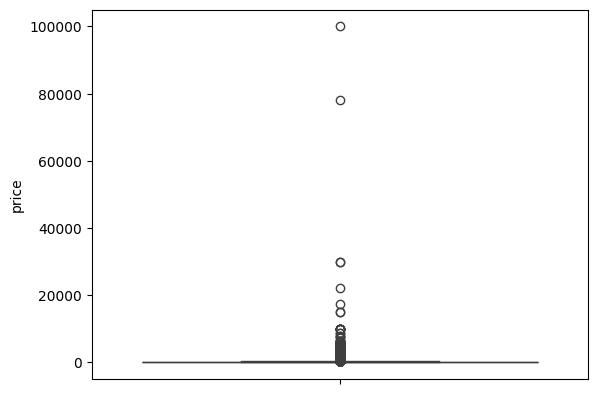

In [ ]:
# from scipy import stats

# confidence = 0.95
# losses = (np.exp(y_test_pred) - np.exp(y_test_preprocessed)) ** 2

# np.sqrt(stats.t.interval(confidence, len(losses) - 1, loc=np.mean(losses), scale=stats.sem(losses)))

# array([[ 704.38927722,  705.05547447,  704.83795293, ...,  704.80553465,
#          704.34042197,  704.29989126],
#        [1225.67438712, 1225.29128578, 1225.41642604, ..., 1225.43507189,
#         1225.7024627 , 1225.72575247]])

# save model in pkl file then build backend API

In [ ]:
# import json

# # Save the best parameters
# best_params = grid_search.best_params_
# with open("best_params.json", "w") as f:
#     json.dump(best_params, f)

# # Save the best score
# best_score = grid_search.best_score_
# with open("best_score.txt", "w") as f:
#     f.write(str(best_score))


In [ ]:
# import dill

# with open("grid_search_dill.pkl", "wb") as f:
#     dill.dump(grid_search, f)

In [ ]:
# import pickle

# best_model = grid_search.best_estimator_

# # Save the trained model
# with open("/content/input & output/best_model.pkl", "wb") as model_file:
#     pickle.dump(best_model, model_file)


In [ ]:
# import dill

# best_model = grid_search.best_estimator_

# # Save the best model using dill
# with open("best_model.pkl", "wb") as file:
#     dill.dump(best_model, file)


In [ ]:
# import dill

# # Load the model from the file
# with open("/kaggle/working/grid_search_dill.pkl", "rb") as file:
#     model = dill.load(file)

# # Inspect the model to understand its structure
# print(model)


In [ ]:
# import dill

# # Load the model from the file
# with open("/kaggle/working/best_model.pkl", "rb") as file:
#     model = dill.load(file)

# # Inspect the model to understand its structure
# print(model)


In [ ]:
# Pipeline(steps=[('preprocessor',
#                  ColumnTransformer(transformers=[('num_knn_lb_ub_ro_pipeline',
#                                                   Pipeline(steps=[('impute',
#                                                                    KNNImputer()),
#                                                                   ('handle_outliers',
#                                                                    Handle_outliers_lb_ub()),
#                                                                   ('scale',
#                                                                    RobustScaler())]),
#                                                   ['availability_365',
#                                                    'latitude', 'longitude']),
#                                                  ('date_knn_pipeline',
#                                                   Pipeline(steps=[('knn_imputer',
#                                                                    KNNImputer())]),
#                                                   ['last_review']),
#                                                  ('cat_si_ohe_pip...
#                                                   Pipeline(steps=[('impute',
#                                                                    SimpleImputer(strategy='median')),
#                                                                   ('log_transform',
#                                                                    LogTransfomer()),
#                                                                   ('scale',
#                                                                    RobustScaler())]),
#                                                   ['minimum_nights',
#                                                    'calculated_host_listings_count',
#                                                    'number_of_reviews_ltm',
#                                                    'distance_to_city_center',
#                                                    'price_per_distance',
#                                                    'price_relative_to_room_type'])])),
#                 ('model',
#                  GradientBoostingRegressor(max_depth=7, n_estimators=300,
#                                            random_state=42))])

In [ ]:
best_model = grid_search.best_estimator_
import dill
with open('model.dill', 'wb') as f:
    dill.dump(best_model, f)




In [ ]:
# import pickle

# with open('model.pkl', 'wb') as model_file:
#     pickle.dump(model, model_file)


In [ ]:
import dill

# Load the model from the file
with open("/kaggle/working/model.dill", "rb") as file:
    model = dill.load(file)

# Inspect the model to understand its structure
print(model)

In [ ]:
# Pipeline(steps=[('preprocessor',
#                  ColumnTransformer(transformers=[('num_knn_lb_ub_ro_pipeline',
#                                                   Pipeline(steps=[('impute',
#                                                                    KNNImputer()),
#                                                                   ('handle_outliers',
#                                                                    Handle_outliers_lb_ub()),
#                                                                   ('scale',
#                                                                    RobustScaler())]),
#                                                   ['availability_365',
#                                                    'latitude', 'longitude']),
#                                                  ('date_knn_pipeline',
#                                                   Pipeline(steps=[('knn_imputer',
#                                                                    KNNImputer())]),
#                                                   ['last_review']),
#                                                  ('cat_si_ohe_pip...
#                                                   Pipeline(steps=[('impute',
#                                                                    SimpleImputer(strategy='median')),
#                                                                   ('log_transform',
#                                                                    LogTransfomer()),
#                                                                   ('scale',
#                                                                    RobustScaler())]),
#                                                   ['minimum_nights',
#                                                    'calculated_host_listings_count',
#                                                    'number_of_reviews_ltm',
#                                                    'distance_to_city_center',
#                                                    'price_per_distance',
#                                                    'price_relative_to_room_type'])])),
#                 ('model',
#                  GradientBoostingRegressor(max_depth=7, n_estimators=300,
#                                            random_state=42))])